In [1]:
!pip install rdkit==2023.9.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.6 MB/s eta 0:00:00


In [2]:
import rdkit
from rdkit import Chem, RDLogger
from rdkit.Chem import Draw, AllChem, PandasTools, BRICS, MACCSkeys, Descriptors, rdMolDescriptors
from rdkit.Chem.Draw import rdMolDraw2D, SimilarityMaps
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity, DiceSimilarity
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors3D
import warnings


import pandas as pd
import numpy as np
from collections import Counter

warnings.filterwarnings("ignore")
RDLogger.DisableLog('rdApp.*')


In [3]:
# read excel files using pandas
df = pd.read_excel('nitrogencompounds.xlsx')

In [4]:
df.head()

,Name,Smiles
0,1-formylpiperidine,O=CN1CCCCC1
1,"N,N-diethylformamide",O=CN(CC)CC
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O
3,pyrrolidin-2-one,O=C1CCCN1
4,N-methylpropionamide,CNC(CC)=O


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    50 non-null     object
 1   Smiles  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


# **Reading, Drawing, and Writing Molecules**

**Reading SMILES**

In [6]:
# for a single SMILES string

mol = Chem.MolFromSmiles('O=CN1CCCCC1')

In [7]:
print(mol)

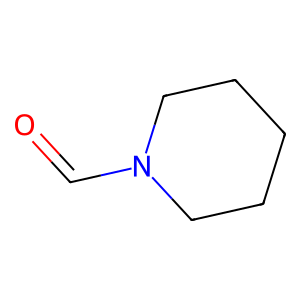

In [8]:
img = Draw.MolToImage(mol)
img

In [9]:
Draw.MolToFile(mol,'mol.png')

In [10]:
# generate molecular objects for the whole datase

In [11]:
df.head()

,Name,Smiles
0,1-formylpiperidine,O=CN1CCCCC1
1,"N,N-diethylformamide",O=CN(CC)CC
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O
3,pyrrolidin-2-one,O=C1CCCN1
4,N-methylpropionamide,CNC(CC)=O


In [12]:
mol_list = []

for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns=(['Mol']))], axis=1)

In [13]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc37e2c70>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc37e2ce0>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc37e2d50>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc37e2dc0>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc37e2e30>


In [14]:
# creating images from molecular objects
img=Draw.MolsToGridImage(df['Mol'][:16],
                         molsPerRow=4,
                         subImgSize=(400,400),
                         legends=[x for x in df['Name'][:16]],
                         )


open('image.png', 'wb').write(img.data)

130256

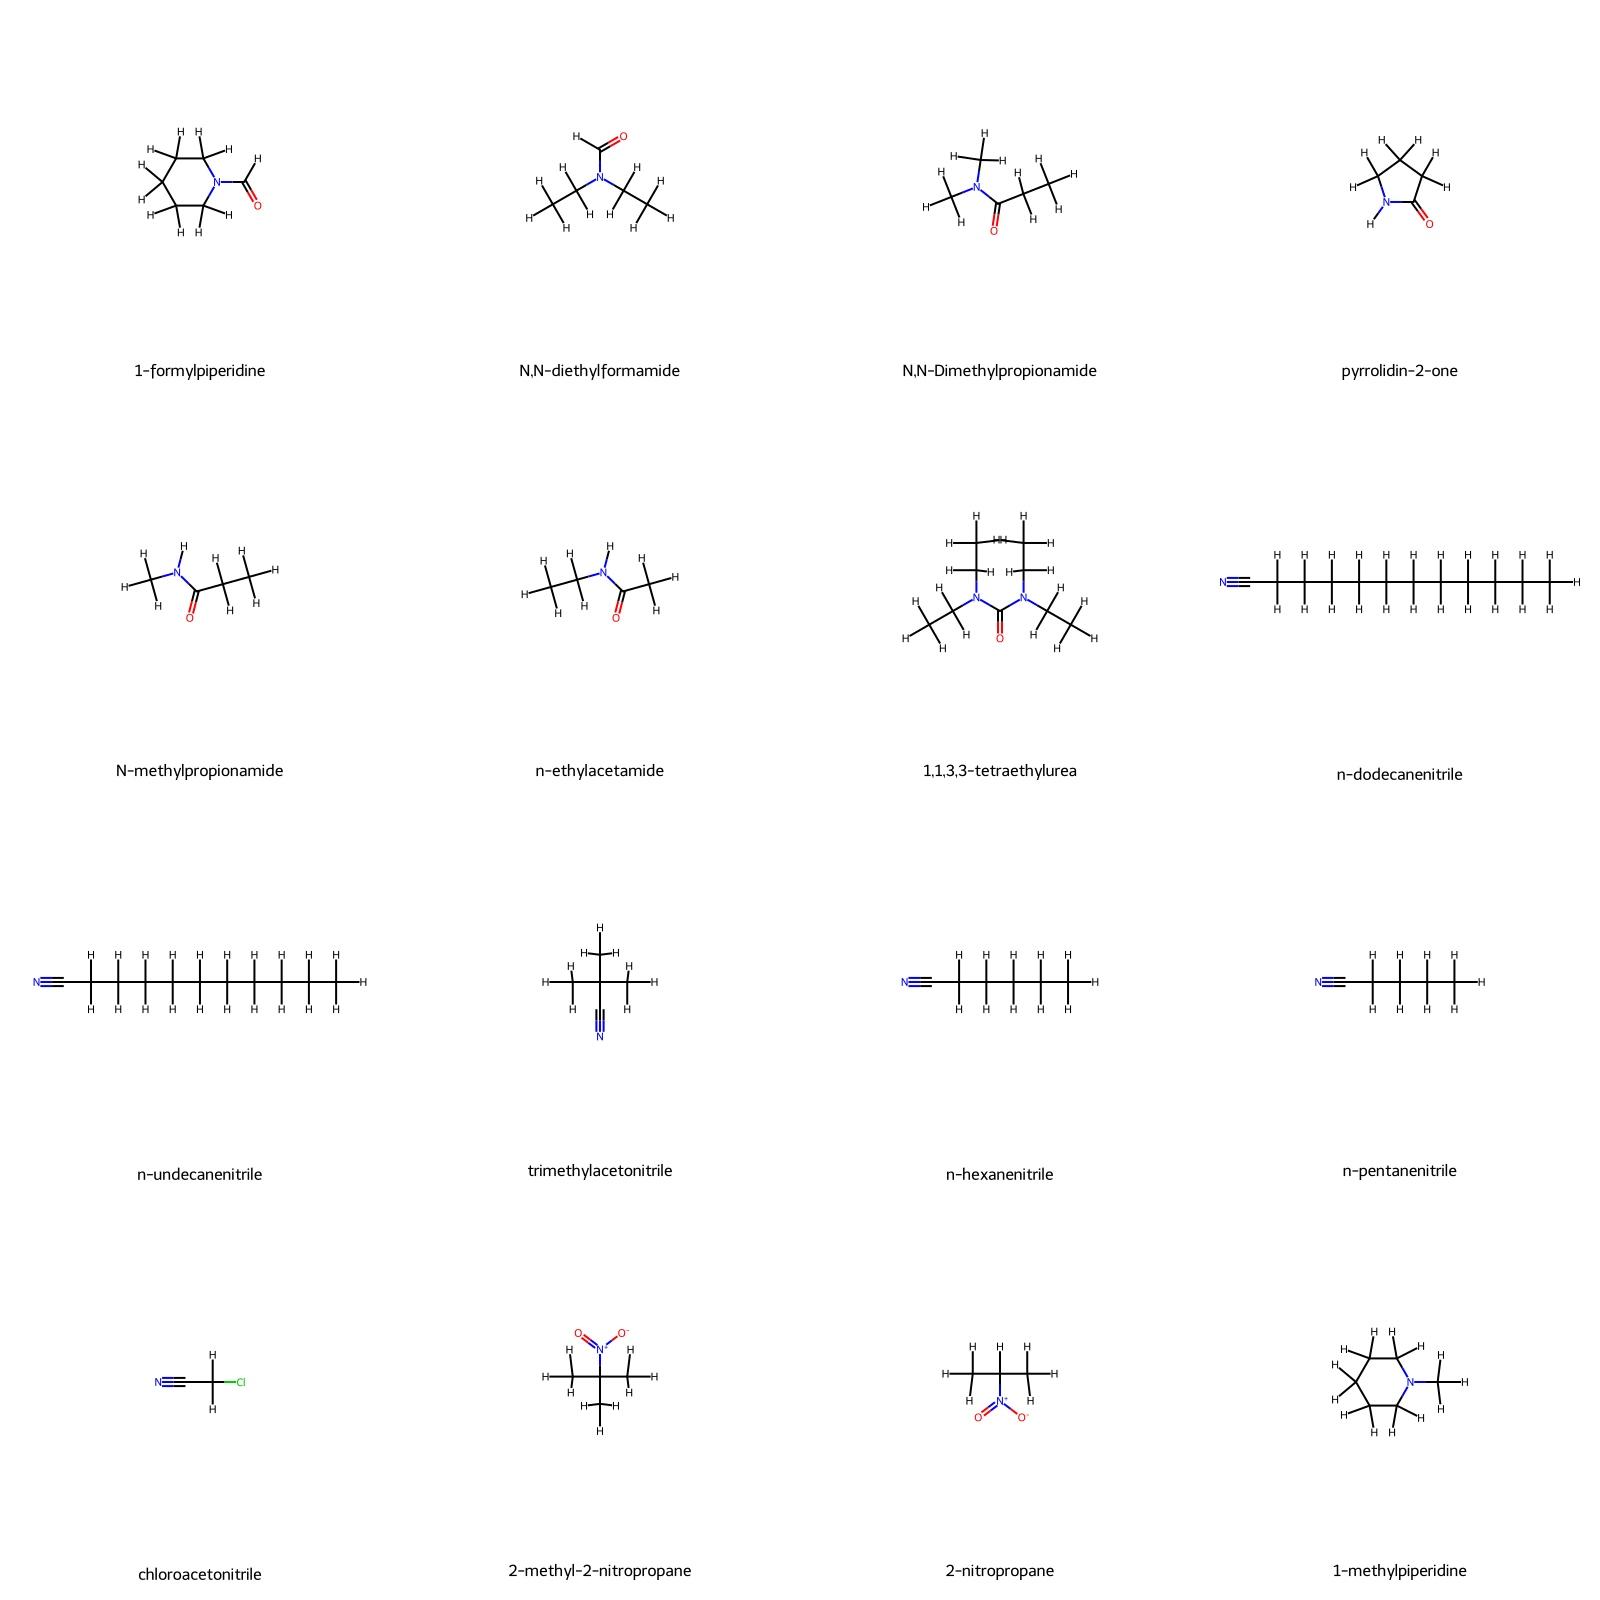

In [15]:
img

In [16]:
# create molecular objects using rdkit.Chem.PandasTools module
PandasTools.AddMoleculeColumnToFrame(df, 'Smiles', 'Mol')

In [17]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798dd0>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc3798e40>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798eb0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f20>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f90>


In [18]:
# creating images from molecular objects
img=Draw.MolsToGridImage(df['Mol'][:16],
                         molsPerRow=4,
                         subImgSize=(200,200),
                         legends=[x for x in df['Name'][:16]]
                         )



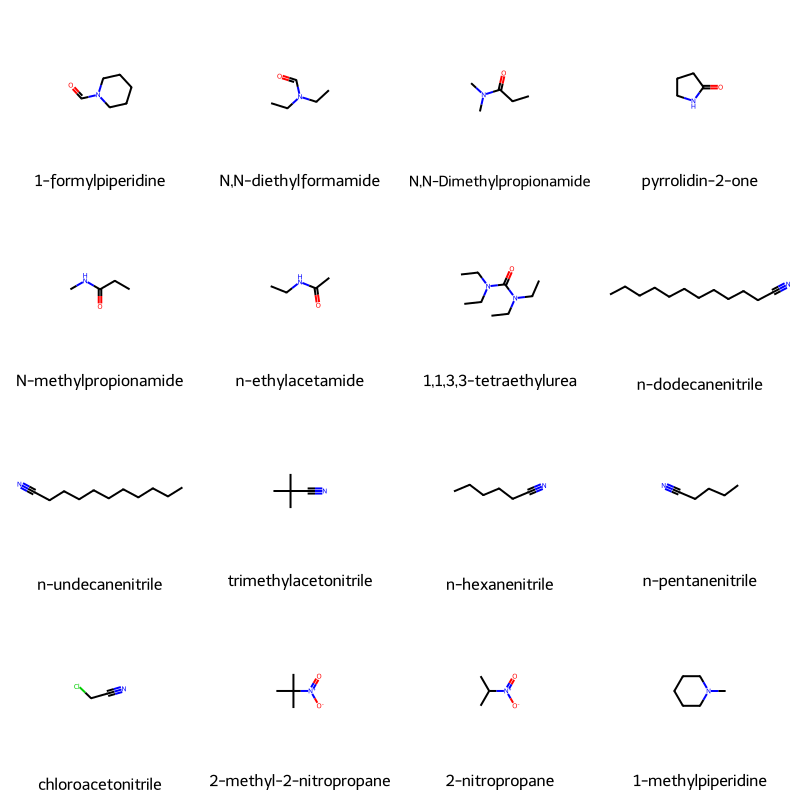

In [19]:
img

**Reading .sdf files**

In [20]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798dd0>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc3798e40>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798eb0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f20>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f90>


In [21]:
SDF = PandasTools.LoadSDF('sample.sdf',
                            smilesName='SMILES',
                            molColName='Molecule',
                            )

,PUBCHEM_COMPOUND_CID,PUBCHEM_COMPOUND_CANONICALIZED,PUBCHEM_CACTVS_COMPLEXITY,PUBCHEM_CACTVS_HBOND_ACCEPTOR,PUBCHEM_CACTVS_HBOND_DONOR,PUBCHEM_CACTVS_ROTATABLE_BOND,PUBCHEM_CACTVS_SUBSKEYS,PUBCHEM_IUPAC_OPENEYE_NAME,PUBCHEM_IUPAC_CAS_NAME,PUBCHEM_IUPAC_NAME_MARKUP,...,PUBCHEM_ATOM_UDEF_STEREO_COUNT,PUBCHEM_BOND_DEF_STEREO_COUNT,PUBCHEM_BOND_UDEF_STEREO_COUNT,PUBCHEM_ISOTOPIC_ATOM_COUNT,PUBCHEM_COMPONENT_COUNT,PUBCHEM_CACTVS_TAUTO_COUNT,PUBCHEM_COORDINATE_TYPE,ID,SMILES,Molecule
0,12965,1,68.5,1,0,1,AAADccBiIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,"N,N-dimethylpropanamide","N,N-dimethylpropanamide","<I>N</I>,<I>N</I>-dimethylpropanamide",...,0,0,0,0,1,-1,1\n5\n255,12965,CCC(=O)N(C)C,

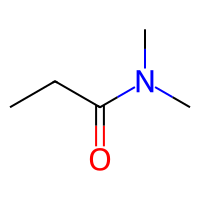

In [22]:
SDF

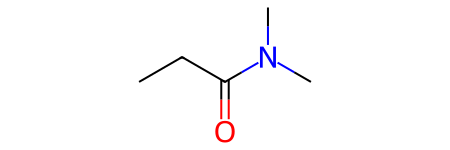

In [23]:
mol = SDF['Molecule'][0]
mol

**Reading sets of molecules**

> Groups of molecules in .sdf files are read using a Supplier




In [24]:
!wget https://github.com/rdkit/rdkit-tutorials/raw/master/data/approved_drugs.sdf

--2024-01-21 17:35:13--  https://github.com/rdkit/rdkit-tutorials/raw/master/data/approved_drugs.sdf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdkit/rdkit-tutorials/master/data/approved_drugs.sdf [following]
--2024-01-21 17:35:14--  https://raw.githubusercontent.com/rdkit/rdkit-tutorials/master/data/approved_drugs.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4085032 (3.9M) [text/plain]
Saving to: ‘approved_drugs.sdf’

approved_drugs.sdf  100%[===================>]   3.90M  --.-KB/s    in 0.02s   

2024-01-21 17:35:14 (256 MB/s) - ‘approved_drugs.sdf’ saved [4085032/4085032]



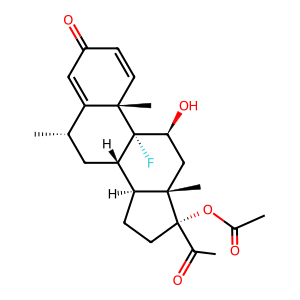

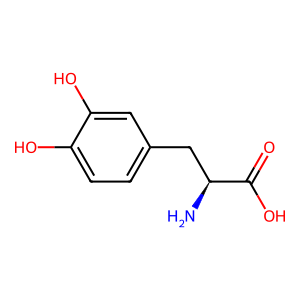

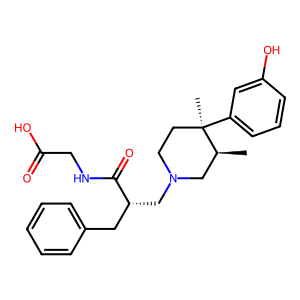

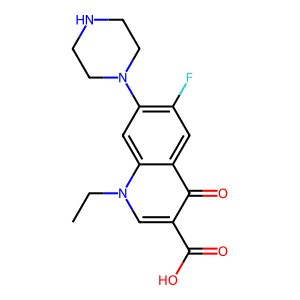

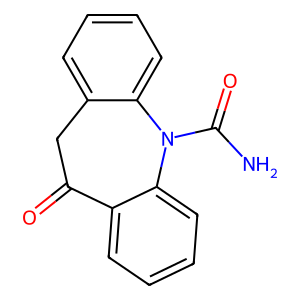

In [25]:
sdmol = Chem.SDMolSupplier('approved_drugs.sdf')
for mol in list(sdmol)[:5]:
  img = Draw.MolToImage(mol)
  display(img)

In [26]:
len(sdmol)

1284

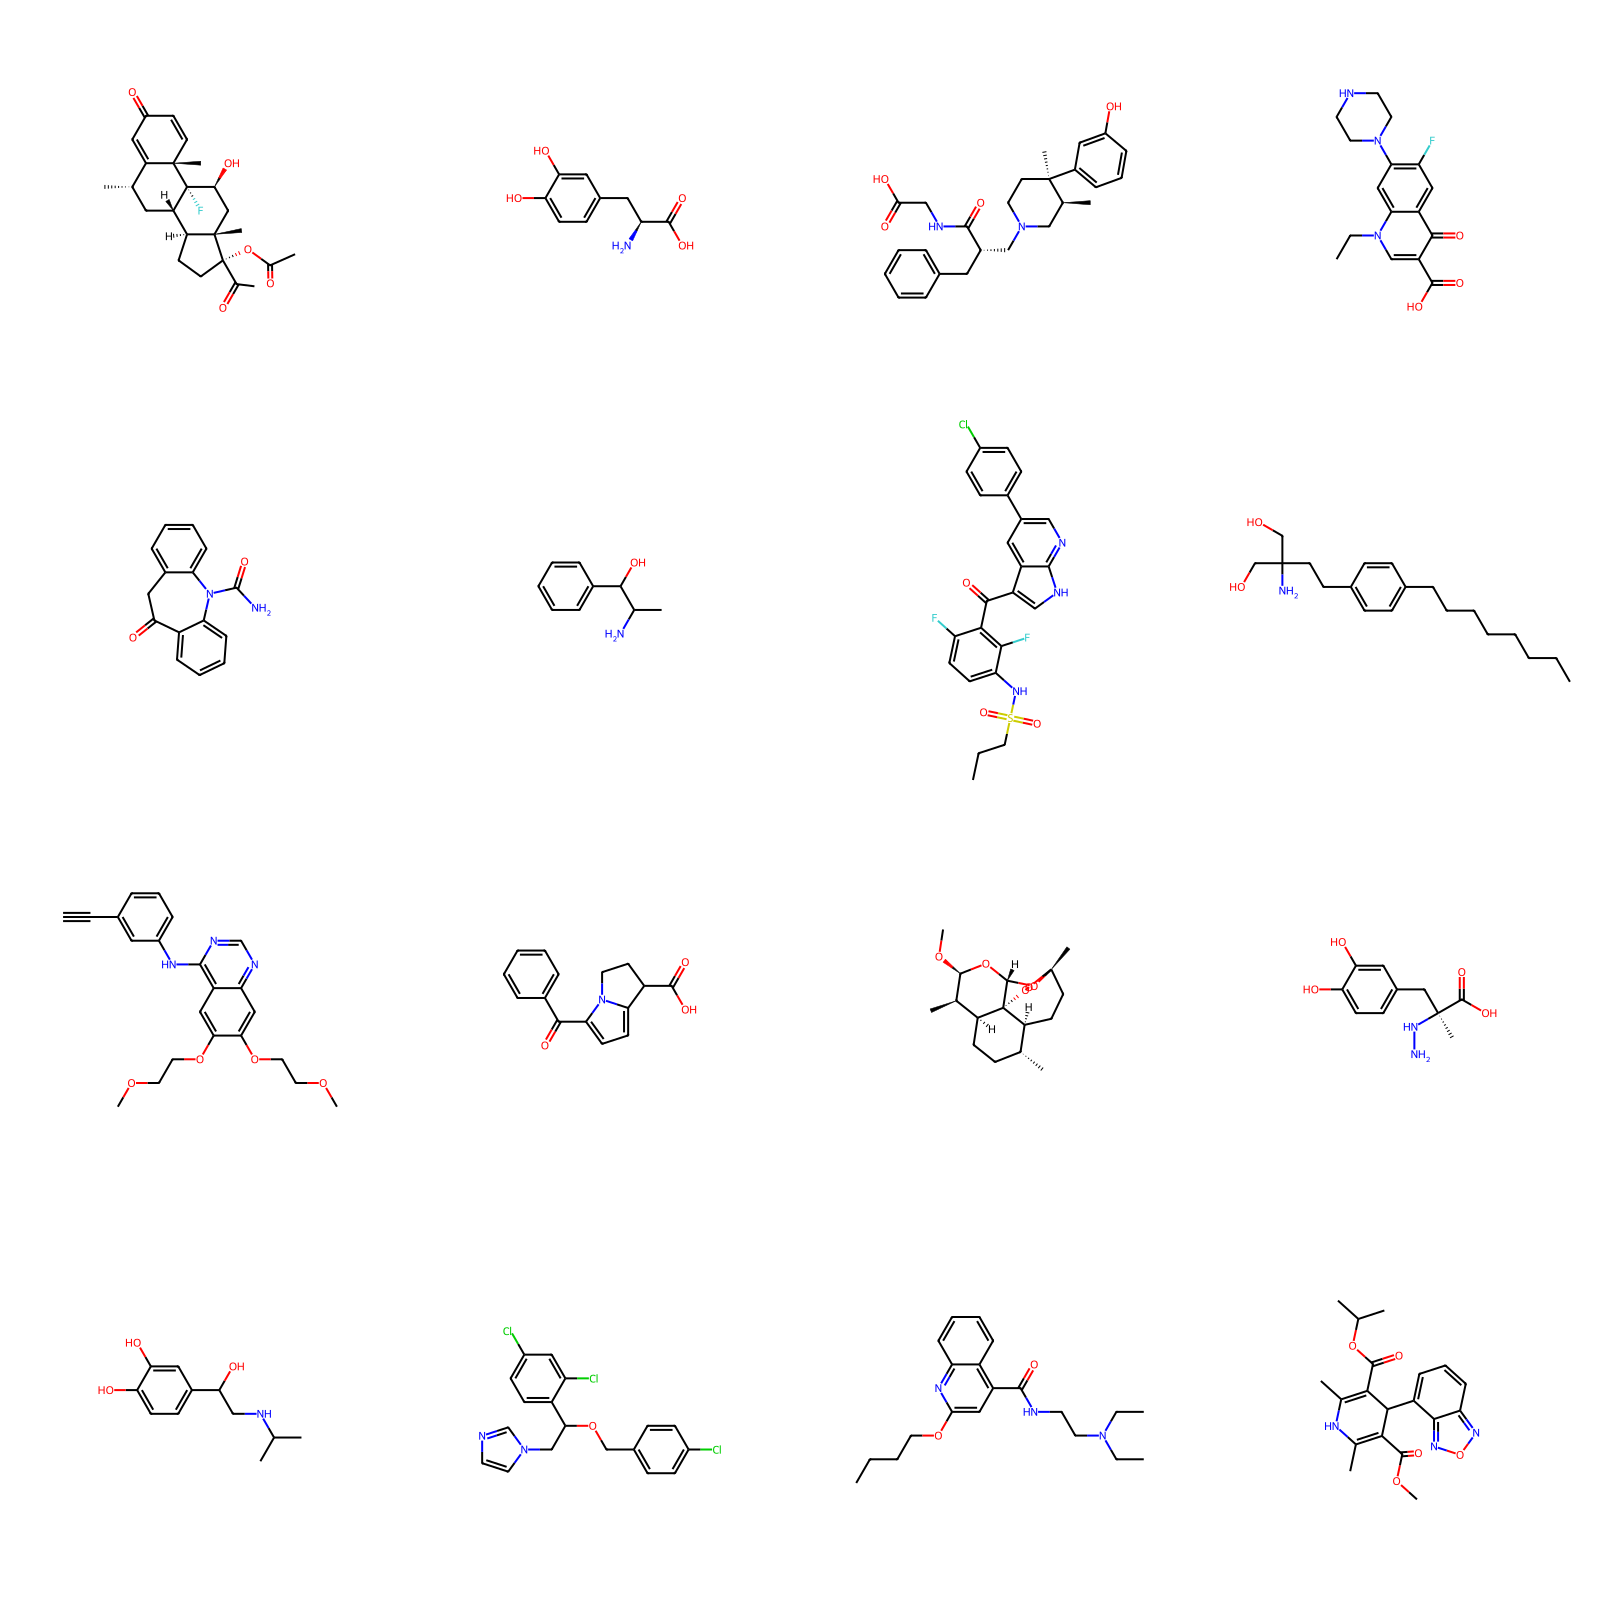

In [27]:
img=Draw.MolsToGridImage(list(sdmol)[:16],
                         molsPerRow=4,
                         subImgSize=(400,400),
                         )
img

 **Writing Molecule**

In [28]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798dd0>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc3798e40>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798eb0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f20>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f90>


In [29]:
mol_0 = df['Mol'][0]

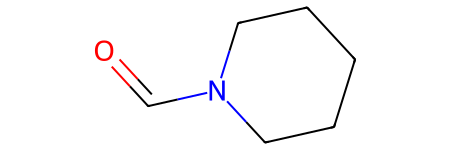

In [30]:
mol_0

In [31]:
Chem.MolToSmiles(mol_0)

'O=CN1CCCCC1'

In [32]:
sdmol = Chem.SDMolSupplier('approved_drugs.sdf')
drugs_smiles = []
for mol in sdmol:
  smile = Chem.MolToSmiles(mol)
  drugs_smiles.append(smile)

drugs_smiles[:10]


['CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C[C@H](C)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
 'N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O',
 'C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@@]1(C)c1cccc(O)c1',
 'CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21',
 'NC(=O)N1c2ccccc2CC(=O)c2ccccc21',
 'CC(N)C(O)c1ccccc1',
 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 'CCCCCCCCc1ccc(CCC(N)(CO)CO)cc1',
 'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1',
 'O=C(c1ccccc1)c1ccc2n1CCC2C(=O)O']

# **Generating 2D and 3D Geometries**

In [33]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798dd0>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc3798e40>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798eb0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f20>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f90>


In [34]:
m = Chem.MolFromSmiles('CN(C)C(CC)=O')
m.SetProp("_Name","mol-2d")
AllChem.Compute2DCoords(m)

0

In [35]:
print(Chem.MolToMolBlock(m))

mol-2d
     RDKit          2D

  7  6  0  0  0  0  0  0  0  0999 V2000
   -2.2837    0.8417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1803   -0.1745    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5086   -1.6381    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2514    0.2730    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3548   -0.7431    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7865   -0.2956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5797    1.7367    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  1  0
  5  6  1  0
  4  7  2  0
M  END



In [36]:
print(Chem.MolToMolBlock(m),file=open('mol-2d.sdf','w+'))

In [37]:
m = Chem.MolFromSmiles('CN(C)C(CC)=O')
m.SetProp("_Name","mol-3d")
m2 = Chem.AddHs(m)
AllChem.EmbedMolecule(m2)

0

In [38]:
print(Chem.MolToMolBlock(m2))


mol-3d
     RDKit          3D

 18 17  0  0  0  0  0  0  0  0999 V2000
   -2.2180   -0.4281   -0.7624 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9180   -0.1215   -0.1442 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8755    1.0948    0.6424 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1615   -0.9884   -0.3315 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5192   -0.8360    0.1858 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0412    0.5508    0.3010 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0468   -2.0435   -1.0355 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3616   -1.5197   -0.7610 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0550    0.0360   -0.2319 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1706   -0.0188   -1.7885 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9139    1.4877    0.8500 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3546    1.8952    0.1076 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4808    0.8955    1.6770 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2353   -1.407

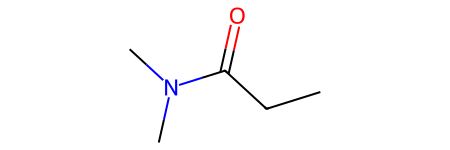

In [39]:
m

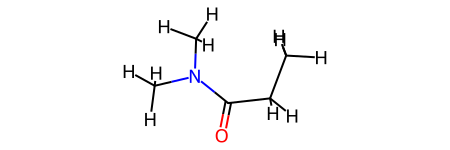

In [40]:
m2

In [41]:
print(Chem.MolToMolBlock(m2),file=open('mol-3d.mol','w+'))

# **Optimizing molecules**

In [42]:
res = AllChem.MMFFOptimizeMoleculeConfs(m2)

In [43]:
res

[(0, -11.761070570397502)]

# **Getting Atom-Centric Properties**

In [44]:
df.tail()

,Name,Smiles,Mol
45,n-cyanomorpholine,N#CN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc379a180>
46,"1,1,3,3-tetramethyl urea",O=C(N(C)C)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x7addc379a1f0>
47,"1,1,3,3-tetramethylguanidine",N=C(N(C)C)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x7addc379a260>
48,dimethylethylurea,O=C(N(C)C)NCC,<rdkit.Chem.rdchem.Mol object at 0x7addc379a2d0>
49,dimethyl propylene urea,O=C1N(C)CCCN1C,<rdkit.Chem.rdchem.Mol object at 0x7addc379a340>


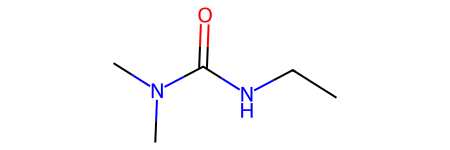

In [45]:
m3 = Chem.MolFromSmiles('O=C(N(C)C)NCC')
m3

In [46]:
atom_list = list(m3.GetAtoms())

In [47]:
print(atom_list)

[<rdkit.Chem.rdchem.Atom object at 0x7addc36aa960>, <rdkit.Chem.rdchem.Atom object at 0x7addc36aa9d0>, <rdkit.Chem.rdchem.Atom object at 0x7addc36aab20>, <rdkit.Chem.rdchem.Atom object at 0x7addc36aab90>, <rdkit.Chem.rdchem.Atom object at 0x7addc36aac00>, <rdkit.Chem.rdchem.Atom object at 0x7addc36aac70>, <rdkit.Chem.rdchem.Atom object at 0x7addc36aace0>, <rdkit.Chem.rdchem.Atom object at 0x7addc36aad50>]


In [48]:
atom_list[2].GetSymbol()

'N'

In [49]:
m3.GetAtomWithIdx(2).GetSymbol()

'N'

In [50]:
m3.GetAtomWithIdx(2).GetAtomicNum()

7

In [51]:
m3.GetBondBetweenAtoms(0,1).GetBondType()

rdkit.Chem.rdchem.BondType.DOUBLE

In [52]:
for atom in m3.GetAtoms():
  print(atom.GetIdx(),atom.GetSymbol(), atom.GetAtomicNum())


0 O 8
1 C 6
2 N 7
3 C 6
4 C 6
5 N 7
6 C 6
7 C 6


In [53]:
for atom in m3.GetAtoms():
  print(atom.GetIdx(),atom.GetSymbol(), atom.GetHybridization())

0 O SP2
1 C SP2
2 N SP2
3 C SP3
4 C SP3
5 N SP2
6 C SP3
7 C SP3


# **Highlighting Molecules**


> Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, and bonds likewise can have a coloured outline applied. An obvious use is to show atoms and bonds that have matched a substructure query







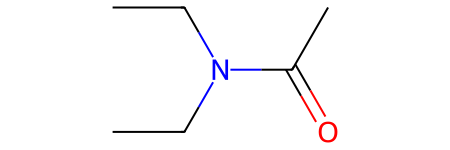

In [54]:
mol = df['Mol'][34]
mol

In [55]:
patt = Chem.MolFromSmarts('NC=O')
hit_ats = list(mol.GetSubstructMatch(patt))
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats)


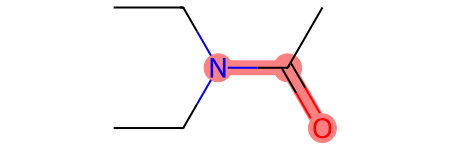

In [56]:
mol

In [57]:
patt = Chem.MolFromSmarts('NC=O')


for mol in df['Mol']:
  hit_ats = list(mol.GetSubstructMatch(patt))
  d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
  rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats)


,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,
1,"N,N-diethylformamide",O=CN(CC)CC,
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,
3,pyrrolidin-2-one,O=C1CCCN1,
4,N-methylpropionamide,CNC(CC)=O,
5,n-ethylacetamide,CC(NCC)=O,
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,
7,n-dodecanenitrile,CCCCCCCCCCCC#N,
8,n-undecanenitrile,CCCCCCCCCCC#N,
9,trimethylacetonitrile,CC(C)(C)C#N,

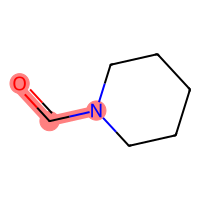
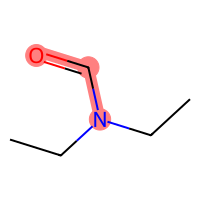
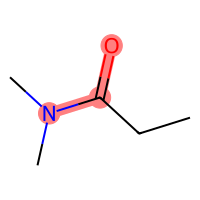
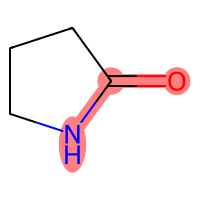
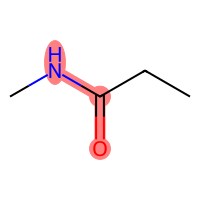
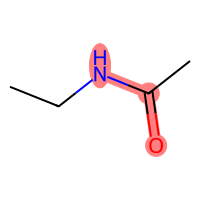
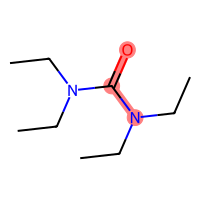
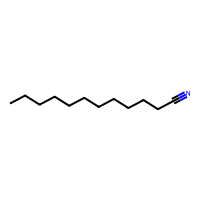
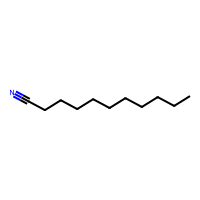
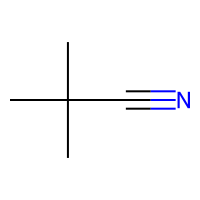
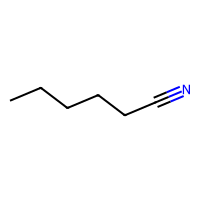
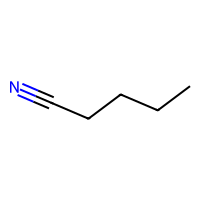
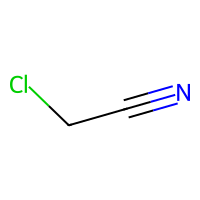
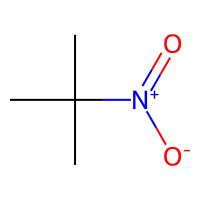
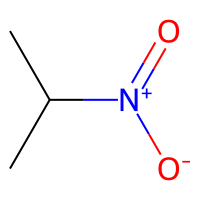
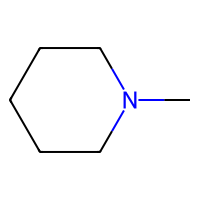
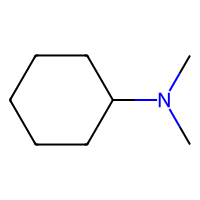
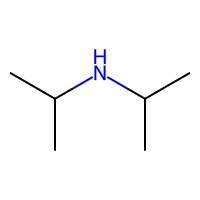
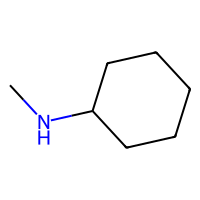
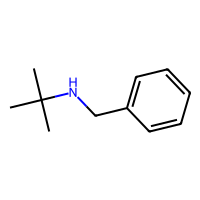
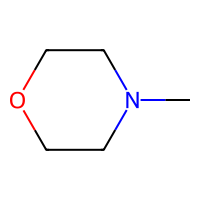
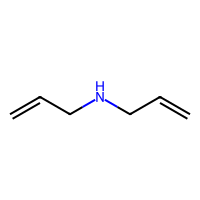
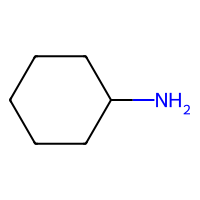
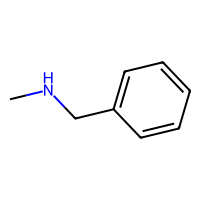
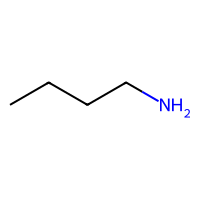
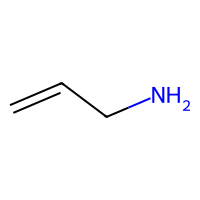
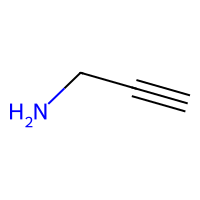
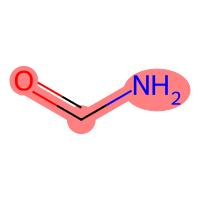
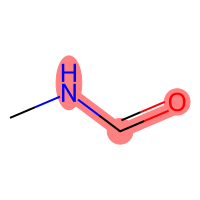
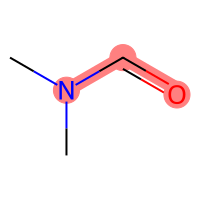
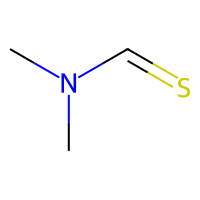
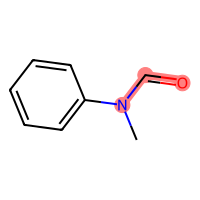
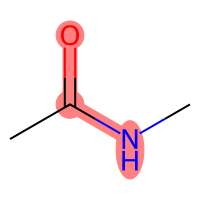
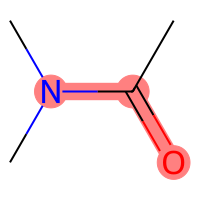
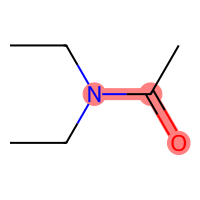
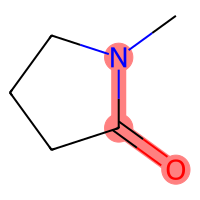
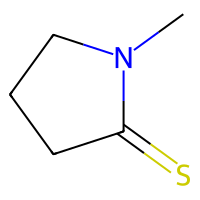
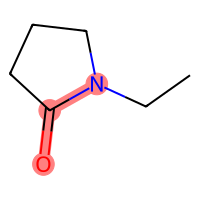
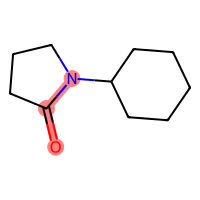
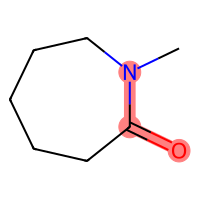
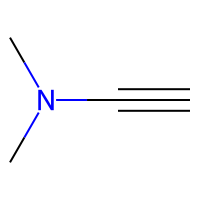
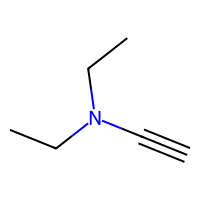
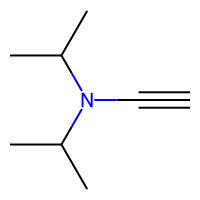
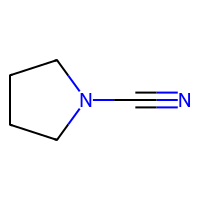
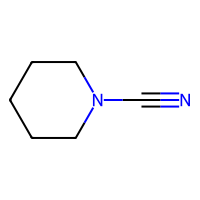
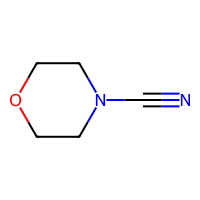
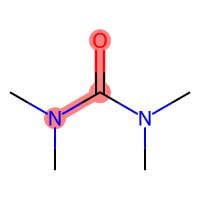
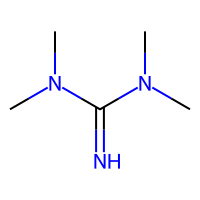
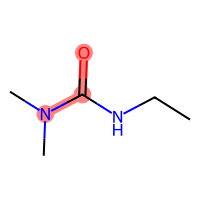
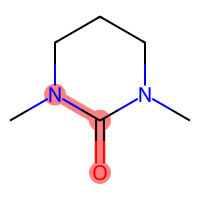

In [58]:
df

# **Substructure Search**

In [59]:
patt = Chem.MolFromSmarts('NC=O')

matches = [mol for mol in df['Mol'] if mol.HasSubstructMatch(patt)]

In [60]:

len(matches)


21

In [61]:
matches

In [62]:
# df[df['Mol'].isin(matches)]

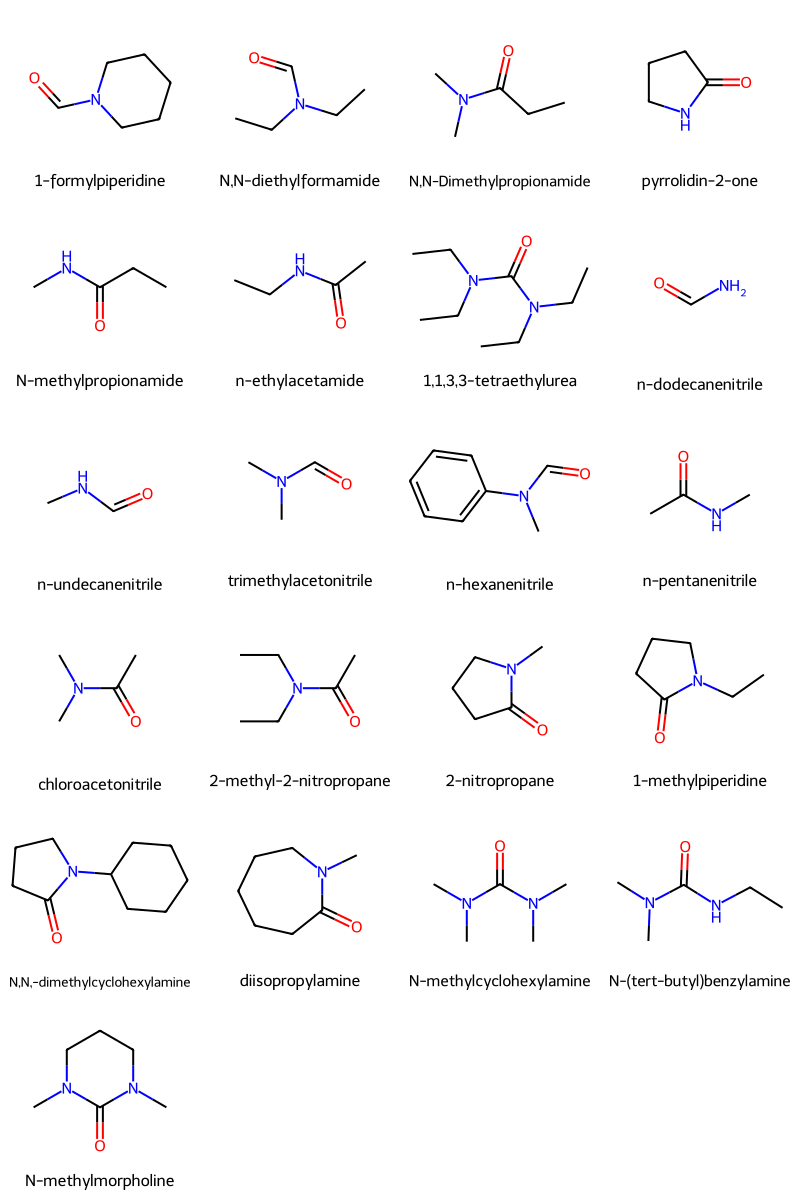

In [63]:
img=Draw.MolsToGridImage(matches,
                         molsPerRow=4,
                         subImgSize=(200,200),
                         legends = [name for name in df['Name']]
                         )
img

# **Delete/Replace Patterns**

**Delete Patterns**

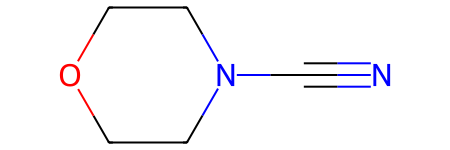

In [64]:
df['Mol'][45]

In [65]:

patt = Chem.MolFromSmarts('C#N')
rm = AllChem.DeleteSubstructs(df['Mol'][45],patt)


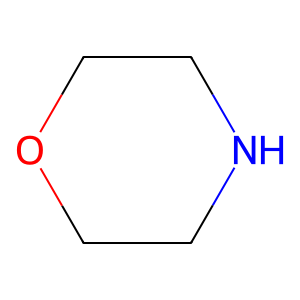

In [66]:
img = Draw.MolToImage(rm)
display(img)

**Repalce patterns**

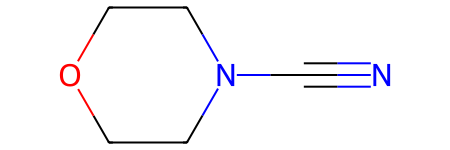

In [67]:
df['Mol'][45]

In [68]:
# insert this pattern
rep = Chem.MolFromSmiles('C(=O)N')
# delete this pattern
patt = Chem.MolFromSmarts('C#N')

rms = AllChem.ReplaceSubstructs(df['Mol'][45],patt,rep)

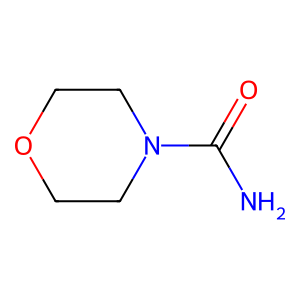

In [69]:
img = Draw.MolToImage(rms[0])
display(img)

# **Fragmentation**

>The RDKit also provides an implementation of the BRICS algorithm. BRICS provides a method for fragmenting molecules along synthetically accessible bonds:



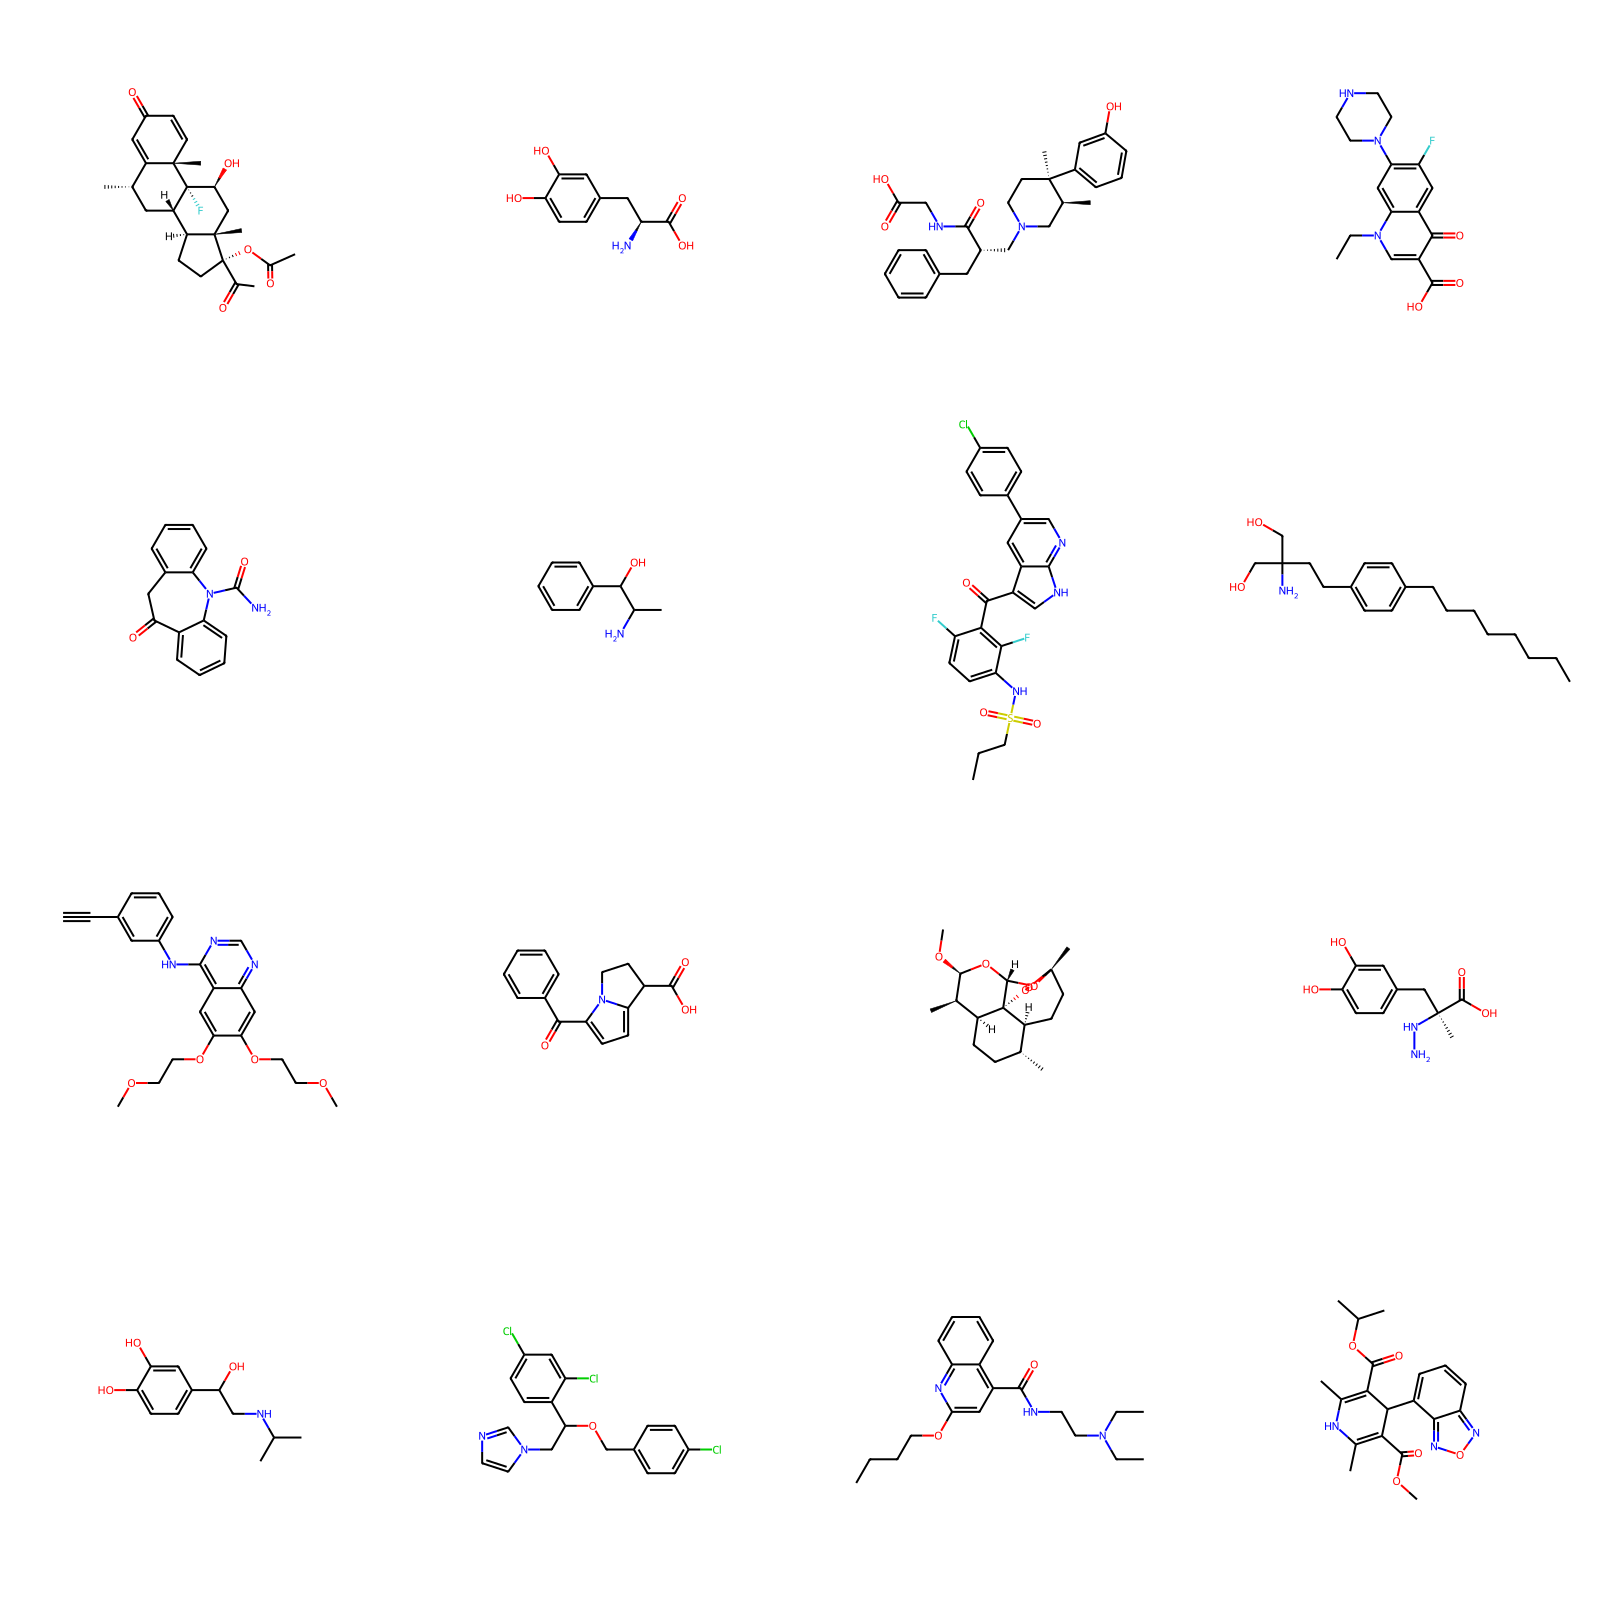

In [70]:
img=Draw.MolsToGridImage(list(sdmol)[:16],
                         molsPerRow=4,
                         subImgSize=(400,400),
                         )
img

In [71]:
fragms = sorted(BRICS.BRICSDecompose(sdmol[2]))
fragms


['[1*]C(=O)[C@H](C[4*])C[8*]',
 '[16*]c1cccc(O)c1',
 '[16*]c1ccccc1',
 '[4*]CC(=O)O',
 '[5*]N1CC[C@]([15*])(C)[C@@H](C)C1',
 '[5*]N[5*]']

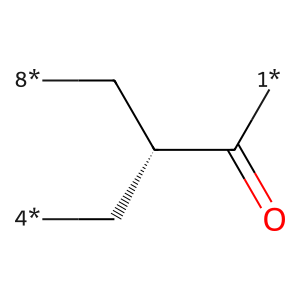

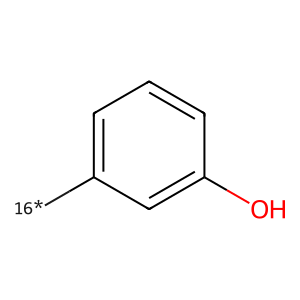

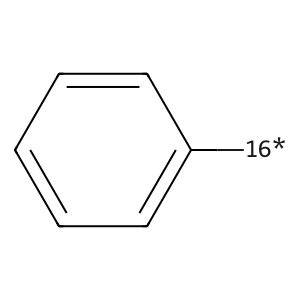

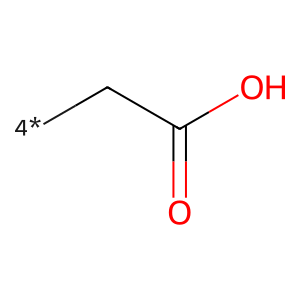

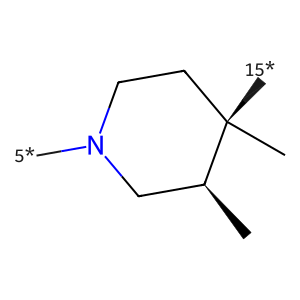

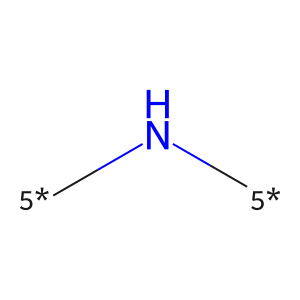

In [72]:
mols = []
for frag in fragms:
  mol = Chem.MolFromSmiles(frag)
  img = Draw.MolToImage(mol)
  display(img)
  mols.append(mol)


 **Rebuilding molecules from fragments**


> The BRICS module also provides an option to apply the BRICS rules to a set of fragments to create new molecules:



In [73]:
ms = BRICS.BRICSBuild(mols)
ms

<generator object BRICSBuild at 0x7addc38a2c00>

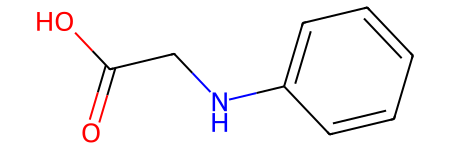

In [74]:
prods = [next(ms) for x in range(5)]
prods[2]

## **Generating Fingerprints**

**MACCS keys**


> A set of 166 public keys implemented as SMARTS



In [75]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798dd0>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc3798e40>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798eb0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f20>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f90>


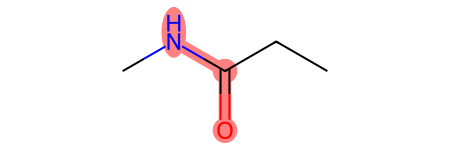

In [76]:
df['Mol'][4]

In [77]:
# generating MACCS-keys for a single molecules and storing as a bit vector
maccs_bv = MACCSkeys.GenMACCSKeys(df['Mol'][4])
maccs_bv

In [78]:
# converting bitvectors into numpy array
maccs_array = np.array(maccs_bv)
print(maccs_array)

# counting the number of 0s and 1s
Counter(maccs_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0]


Counter({0: 149, 1: 18})

In [79]:
# print the position of On bits
print(f'The bits are on at position {list(maccs_bv.GetOnBits())}')

The bits are on at position [92, 93, 104, 110, 111, 114, 116, 117, 132, 149, 151, 154, 155, 156, 158, 160, 161, 164]


In [80]:
# generating MACCS-keys for the whole dataset

maccs_bv = [MACCSkeys.GenMACCSKeys(mol) for mol in df['Mol']]

# converting bitvectors into np array followed by converting into a dataframe and then concatenating it to the original dataset
df_maccs = pd.concat([df, pd.DataFrame(np.array(maccs_bv))], axis=1)

In [81]:
df_maccs.head()

,Name,Smiles,Mol,0,1,2,3,4,5,6,...,157,158,159,160,161,162,163,164,165,166
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798dd0>,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,1,0
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc3798e40>,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798eb0>,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f20>,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f90>,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0


In [82]:
df_maccs.drop('Mol', axis=1).to_excel('maccs_keys.xlsx', index=None)

**Morgan Fingerprint**

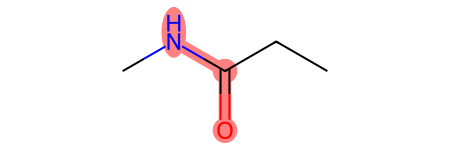

In [83]:
df['Mol'][4]

In [84]:
 # generating Morgan Fingerprint for a single molecules and storing as a bit vector
 bi = {}
 mf_bv = AllChem.GetMorganFingerprintAsBitVect(df['Mol'][4], radius=2, nBits = 2048, bitInfo = bi)

 # converting bitvectors into numpy array
mf_array = np.array(mf_bv)
print(mf_array)

# counting the number of 0s and 1s
print(Counter(mf_array))


[0 0 0 ... 0 0 0]
Counter({0: 2034, 1: 14})


In [85]:
# print the position of on bits
print(f'The bits are on at position {list(mf_bv.GetOnBits())}')

The bits are on at position [41, 80, 294, 345, 632, 650, 807, 898, 1057, 1141, 1152, 1430, 1917, 2013]


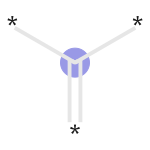

In [86]:
Draw.DrawMorganBit(mol = df['Mol'][4], bitId=807, bitInfo=bi)

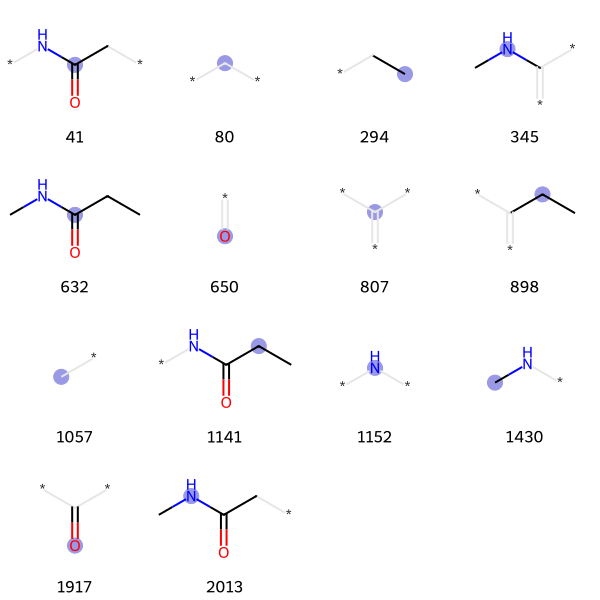

In [87]:
ls = [(df['Mol'][4],x,bi) for x in mf_bv.GetOnBits()]
Draw.DrawMorganBits(ls,molsPerRow=4,legends=[str(x) for x in mf_bv.GetOnBits()])

In [88]:
# generating Morgan Fingerprintfor the whole dataset
mf_bv = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048, bitInfo = bi) for mol in df['Mol']]

# converting bitvectors into np array followed by converting into a dataframe and then concatenating it to the original dataset
df_mf = pd.concat([df, pd.DataFrame(np.array(mf_bv))], axis=1)

In [89]:
df_mf.head()

,Name,Smiles,Mol,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798dd0>,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc3798e40>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798eb0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f20>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f90>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# df_mf.drop('Mol', axis=1).to_excel('mf_keys.xlsx', index=None)

# **Generating Similarity Maps Using Fingerprints**

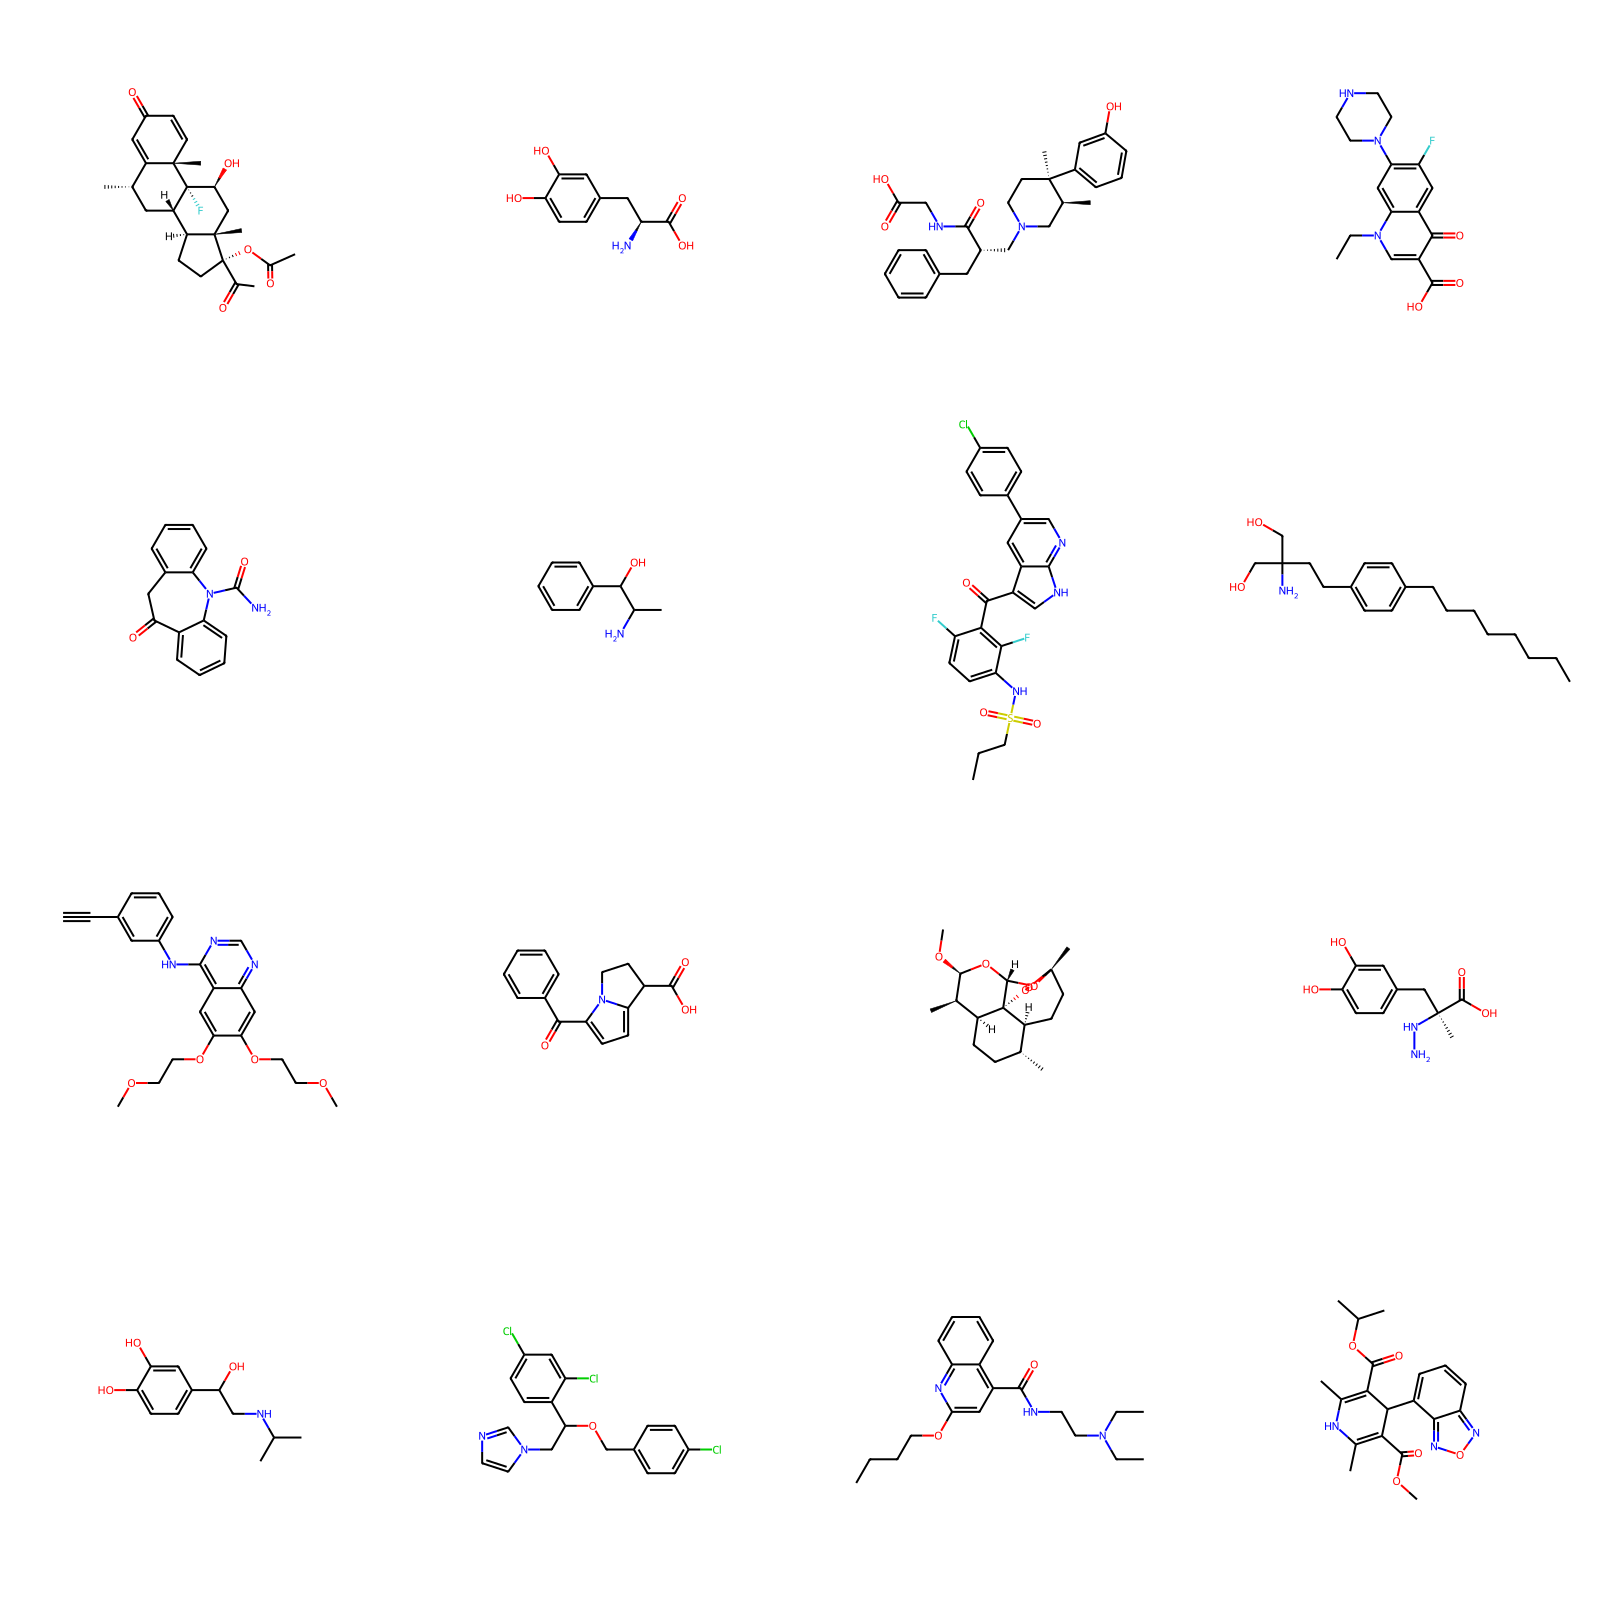

In [91]:
img=Draw.MolsToGridImage(list(sdmol)[:16],
                         molsPerRow=4,
                         subImgSize=(400,400),
                         )
img

In [92]:
# this is the molecule on which we want to generate similarity map
mol = sdmol[14]

In [93]:
# reference molecule
refmol = sdmol[8]

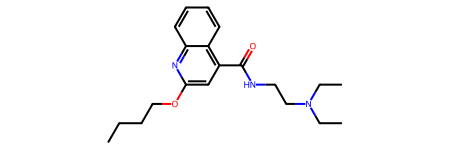

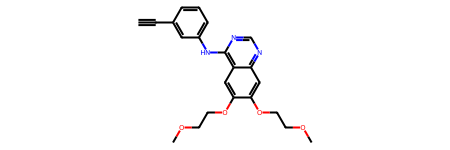

In [94]:
display(mol)
display(refmol)

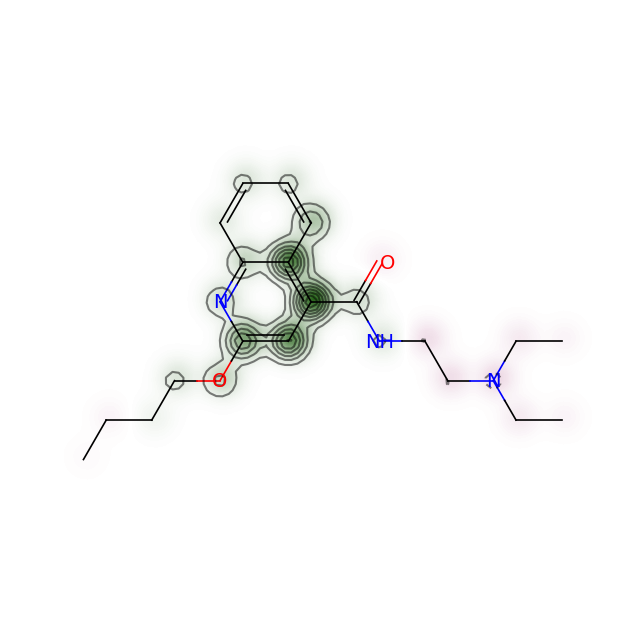

In [95]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetTTFingerprint)
# SimilarityMaps.GetTTFingerprint
#SimilarityMaps.GetAPFingerprint

## **Tanimoto Similarity**

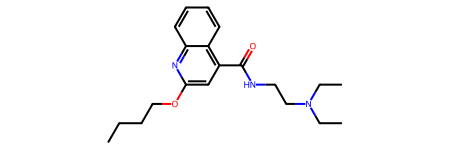

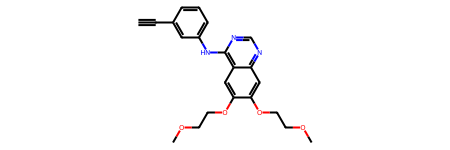

In [96]:
display(mol)
display(refmol)

In [97]:
# generate Morgan Fingerprint for both the molecules
mf_mol = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048)
mf_refmol = AllChem.GetMorganFingerprintAsBitVect(refmol, radius=2, nBits = 2048)

In [98]:
TanimotoSimilarity(mf_mol, mf_refmol)

0.20253164556962025

In [99]:
# generate Morgan Fingerprint for both the molecules
maccs_mol = MACCSkeys.GenMACCSKeys(mol)
maccs_refmol = MACCSkeys.GenMACCSKeys(refmol)

In [100]:
TanimotoSimilarity(maccs_mol, maccs_refmol)

0.5223880597014925

**Other available similarity metrics include Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, and Tversky.**

In [101]:
DiceSimilarity(maccs_mol, maccs_refmol)

0.6862745098039216

**Similarity Coefficients of Ref Molecule With the Whole Dataset**

In [102]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798dd0>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc3798e40>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798eb0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f20>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc3798f90>


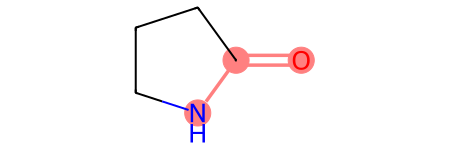

In [103]:
df['Mol'][3]


In [104]:
# generate Morgan Fingerprint for the whole dataset
mf_bv = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048) for mol in df['Mol']]

In [105]:
Tanimoto_similarity = [TanimotoSimilarity(mf_bv[3], x) for x in mf_bv]

In [106]:
# put the Tanimoto coefficient values into data frame.
df["ts_coefficient"] = Tanimoto_similarity

,Name,Smiles,Mol,ts_coefficient
0,1-formylpiperidine,O=CN1CCCCC1,,0.120000
1,"N,N-diethylformamide",O=CN(CC)CC,,0.037037
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,,0.035714
3,pyrrolidin-2-one,O=C1CCCN1,,1.000000
4,N-methylpropionamide,CNC(CC)=O,,0.035714
5,n-ethylacetamide,CC(NCC)=O,,0.035714
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,,0.037037
7,n-dodecanenitrile,CCCCCCCCCCCC#N,,0.000000
8,n-undecanenitrile,CCCCCCCCCCC#N,,0.000000
9,trimethylacetonitrile,CC(C)(C)C#N,,0.000000

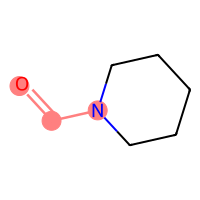
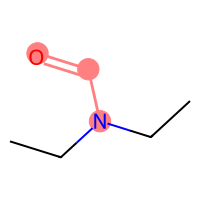
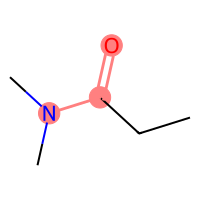
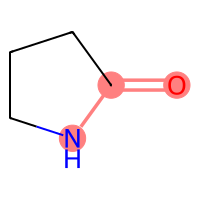
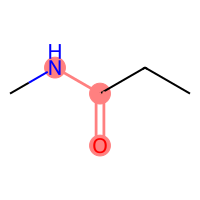
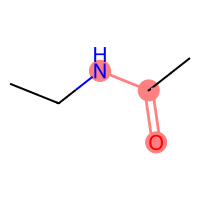
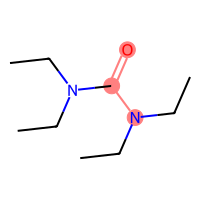
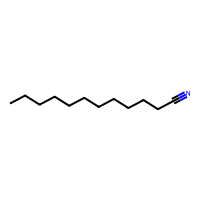
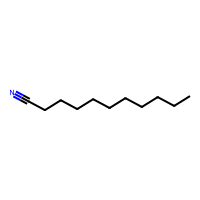
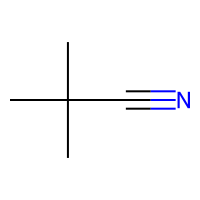
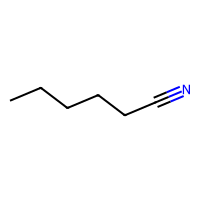
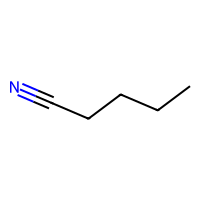
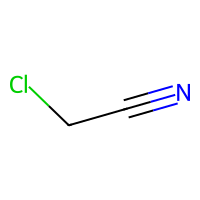
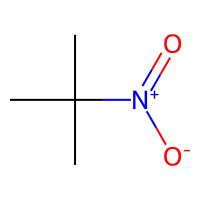
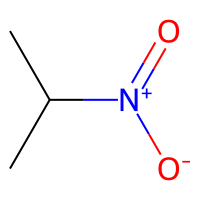
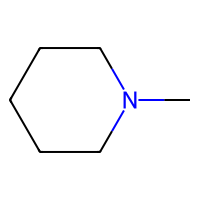
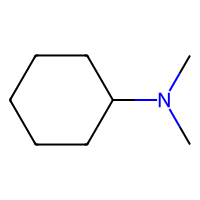
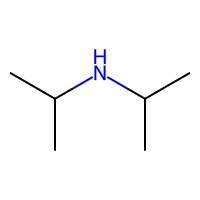
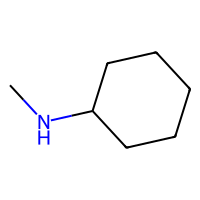
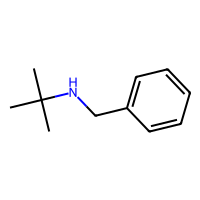
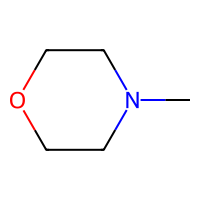
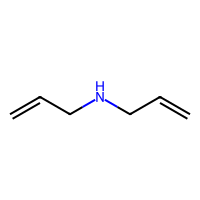
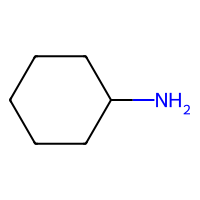
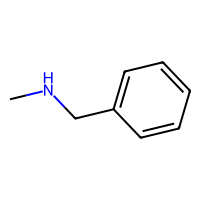
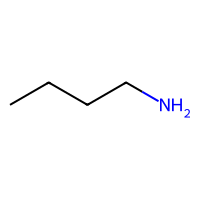
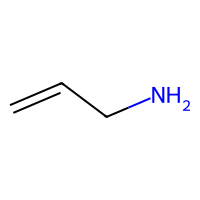
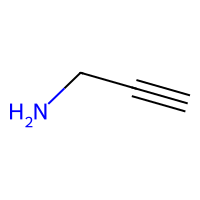
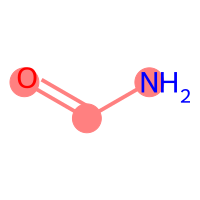
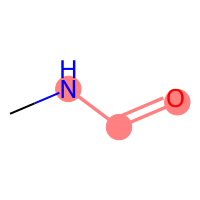
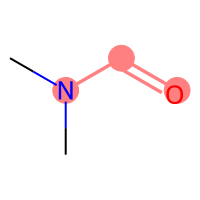
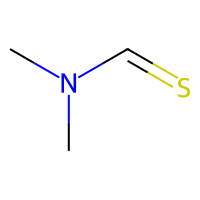
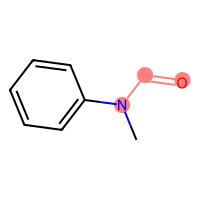
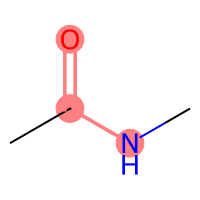
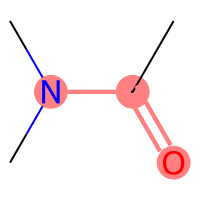
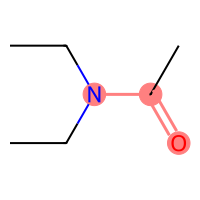
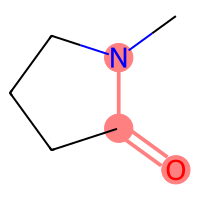
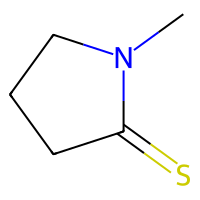
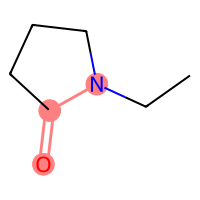
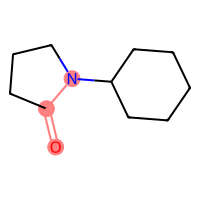
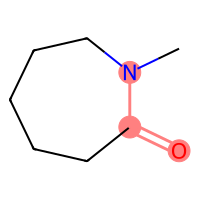
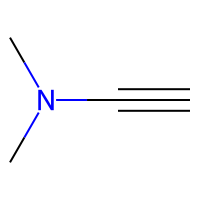
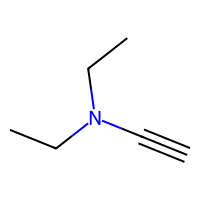
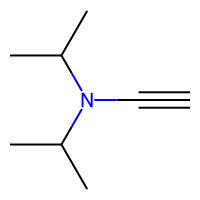
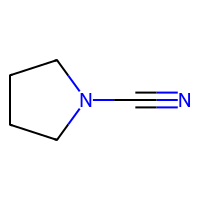
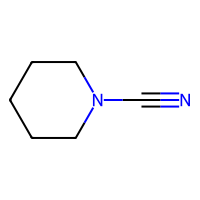
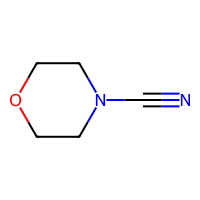
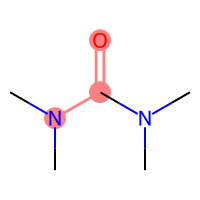
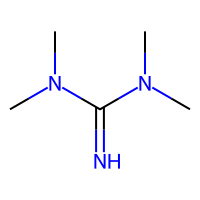
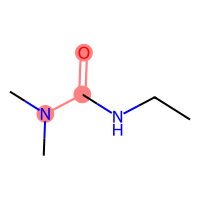
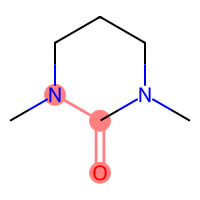

In [107]:
df

# **Generating 2D and 3D descriptors**

In [108]:
# read excel files using pandas
df = pd.read_excel('nitrogencompounds.xlsx')

In [109]:
df.head()

,Name,Smiles
0,1-formylpiperidine,O=CN1CCCCC1
1,"N,N-diethylformamide",O=CN(CC)CC
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O
3,pyrrolidin-2-one,O=C1CCCN1
4,N-methylpropionamide,CNC(CC)=O


In [110]:
# create molecular objects with hydrogens attached
mol_list = []

for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns=(['Mol']))], axis=1)

In [111]:
img=Draw.MolsToGridImage(df['Mol'][:16],
                         molsPerRow=4,
                         subImgSize=(200,200),
                         legends=[x for x in df['Name'][:16]],
                         )

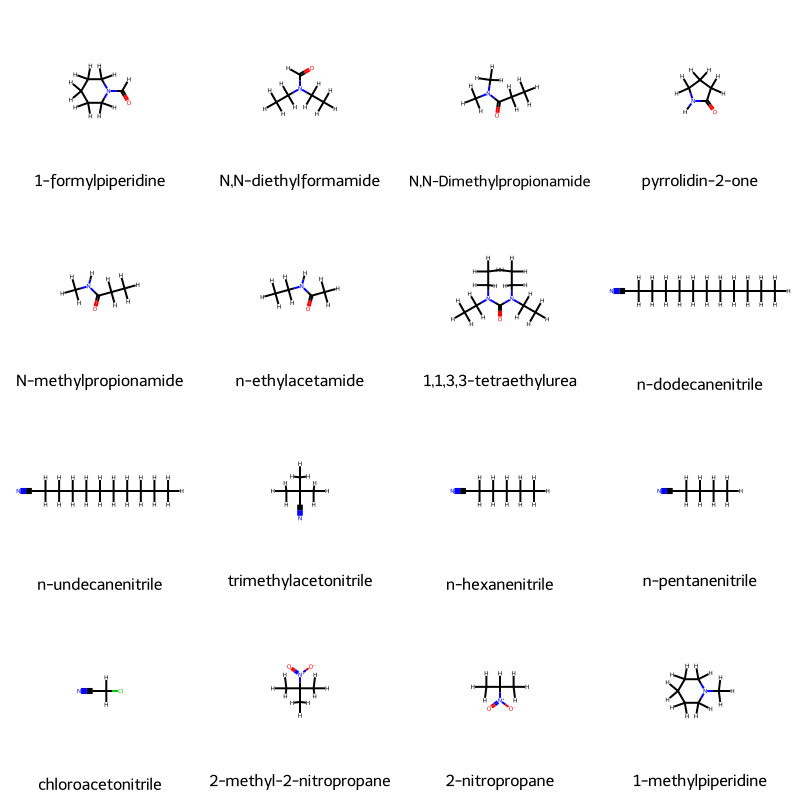

In [112]:
img


 **2D Descriptors**

In [113]:
mol = df['Mol'][3]

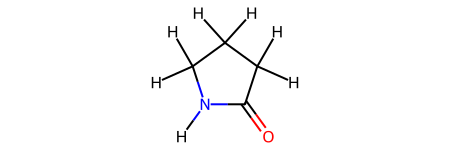

In [114]:
mol

In [115]:
# calculate max absolute partial charges for a single molecule
Descriptors.MaxAbsPartialCharge(mol)

0.35609106220576986

In [116]:
# calculate mol wt for a single molecule
Descriptors.MolWt(mol)

85.10599999999997

In [117]:
# calculate all the descriptors for a single molecule
des = Descriptors.CalcMolDescriptors(mol)
des_df = pd.DataFrame.from_dict([des])
des_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,10.941528,10.941528,0.284722,-3.015046,0.436836,65.0,85.106,78.05,85.052764,34,...,0,0,0,0,0,0,0,0,0,0


**Calculate all the descriptor for the whole dataset**

In [118]:
des_list = []

for mol in df['Mol']:
  des = rdkit.Chem.Descriptors.CalcMolDescriptors(mol)
  des_list.append(des)

In [119]:
Final_df = pd.concat([df, pd.DataFrame(des_list)], axis=1)

In [120]:
Final_df.head()

,Name,Smiles,Mol,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc1d10dd0>,11.073438,11.073438,0.540347,-3.556597,0.456574,72.500000,113.160,...,0,0,0,0,0,0,0,0,0,0
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc1d110e0>,10.943194,10.943194,0.722222,-3.621296,0.473496,39.142857,101.149,...,0,0,0,0,0,0,0,0,0,0
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc1d11070>,11.575903,11.575903,0.702014,-3.601389,0.470276,39.142857,101.149,...,0,0,0,0,0,0,0,0,0,0
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc1d11000>,10.941528,10.941528,0.284722,-3.015046,0.436836,65.000000,85.106,...,0,0,0,0,0,0,0,0,0,0
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc1d10f90>,11.101528,11.101528,0.639514,-3.385764,0.484039,36.333333,87.122,...,0,0,0,0,0,0,0,0,0,0


In [121]:
Final_df.drop('Mol', axis=1).to_excel('final.xlsx', index=None)

**3D Descriptors**

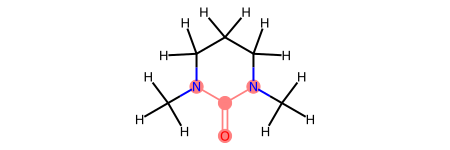

In [122]:
mol

In [123]:
AllChem.EmbedMolecule(mol)

0

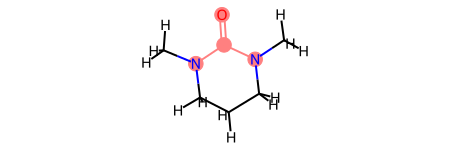

In [124]:
mol

In [125]:
Descriptors3D.CalcMolDescriptors3D(mol)

{'PMI1': 227.45959622295416,
 'PMI2': 306.627163541085,
 'PMI3': 503.3214272819921,
 'NPR1': 0.4519171723947232,
 'NPR2': 0.6092074505886143,
 'RadiusOfGyration': 2.011676648363214,
 'InertialShapeFactor': 0.0026783106129823326,
 'Eccentricity': 0.8920599023018342,
 'Asphericity': 0.2249658348280903,
 'SpherocityIndex': 0.21585872152194444,
 'PBF': 0.4977602779467646}

In [126]:
des_3d = []
for mol in df['Mol']:
  AllChem.EmbedMolecule(mol)
  des = Descriptors3D.CalcMolDescriptors3D(mol)
  des_3d.append(des)

final_3d = pd.concat([df, pd.DataFrame.from_dict(des_3d)], axis=1)

In [127]:
final_3d.head()

,Name,Smiles,Mol,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,PBF
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7addc1d10dd0>,130.243291,317.161021,397.748635,0.327451,0.797391,1.932441,0.006122,0.944868,0.316378,0.411444,0.643758
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7addc1d110e0>,161.654697,230.797562,327.072908,0.494247,0.705646,1.885937,0.004365,0.869322,0.159983,0.438839,0.721704
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc1d11070>,106.122301,282.114085,375.272553,0.282787,0.751758,1.942725,0.007084,0.959183,0.384576,0.176763,0.441781
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7addc1d11000>,71.066862,144.884462,197.851541,0.359193,0.732289,1.559199,0.010304,0.933263,0.284162,0.412147,0.460354
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7addc1d10f90>,53.908261,249.242688,293.208021,0.183857,0.850054,1.850014,0.015769,0.982953,0.547474,0.172846,0.397035


**Visualization of Descriptors**


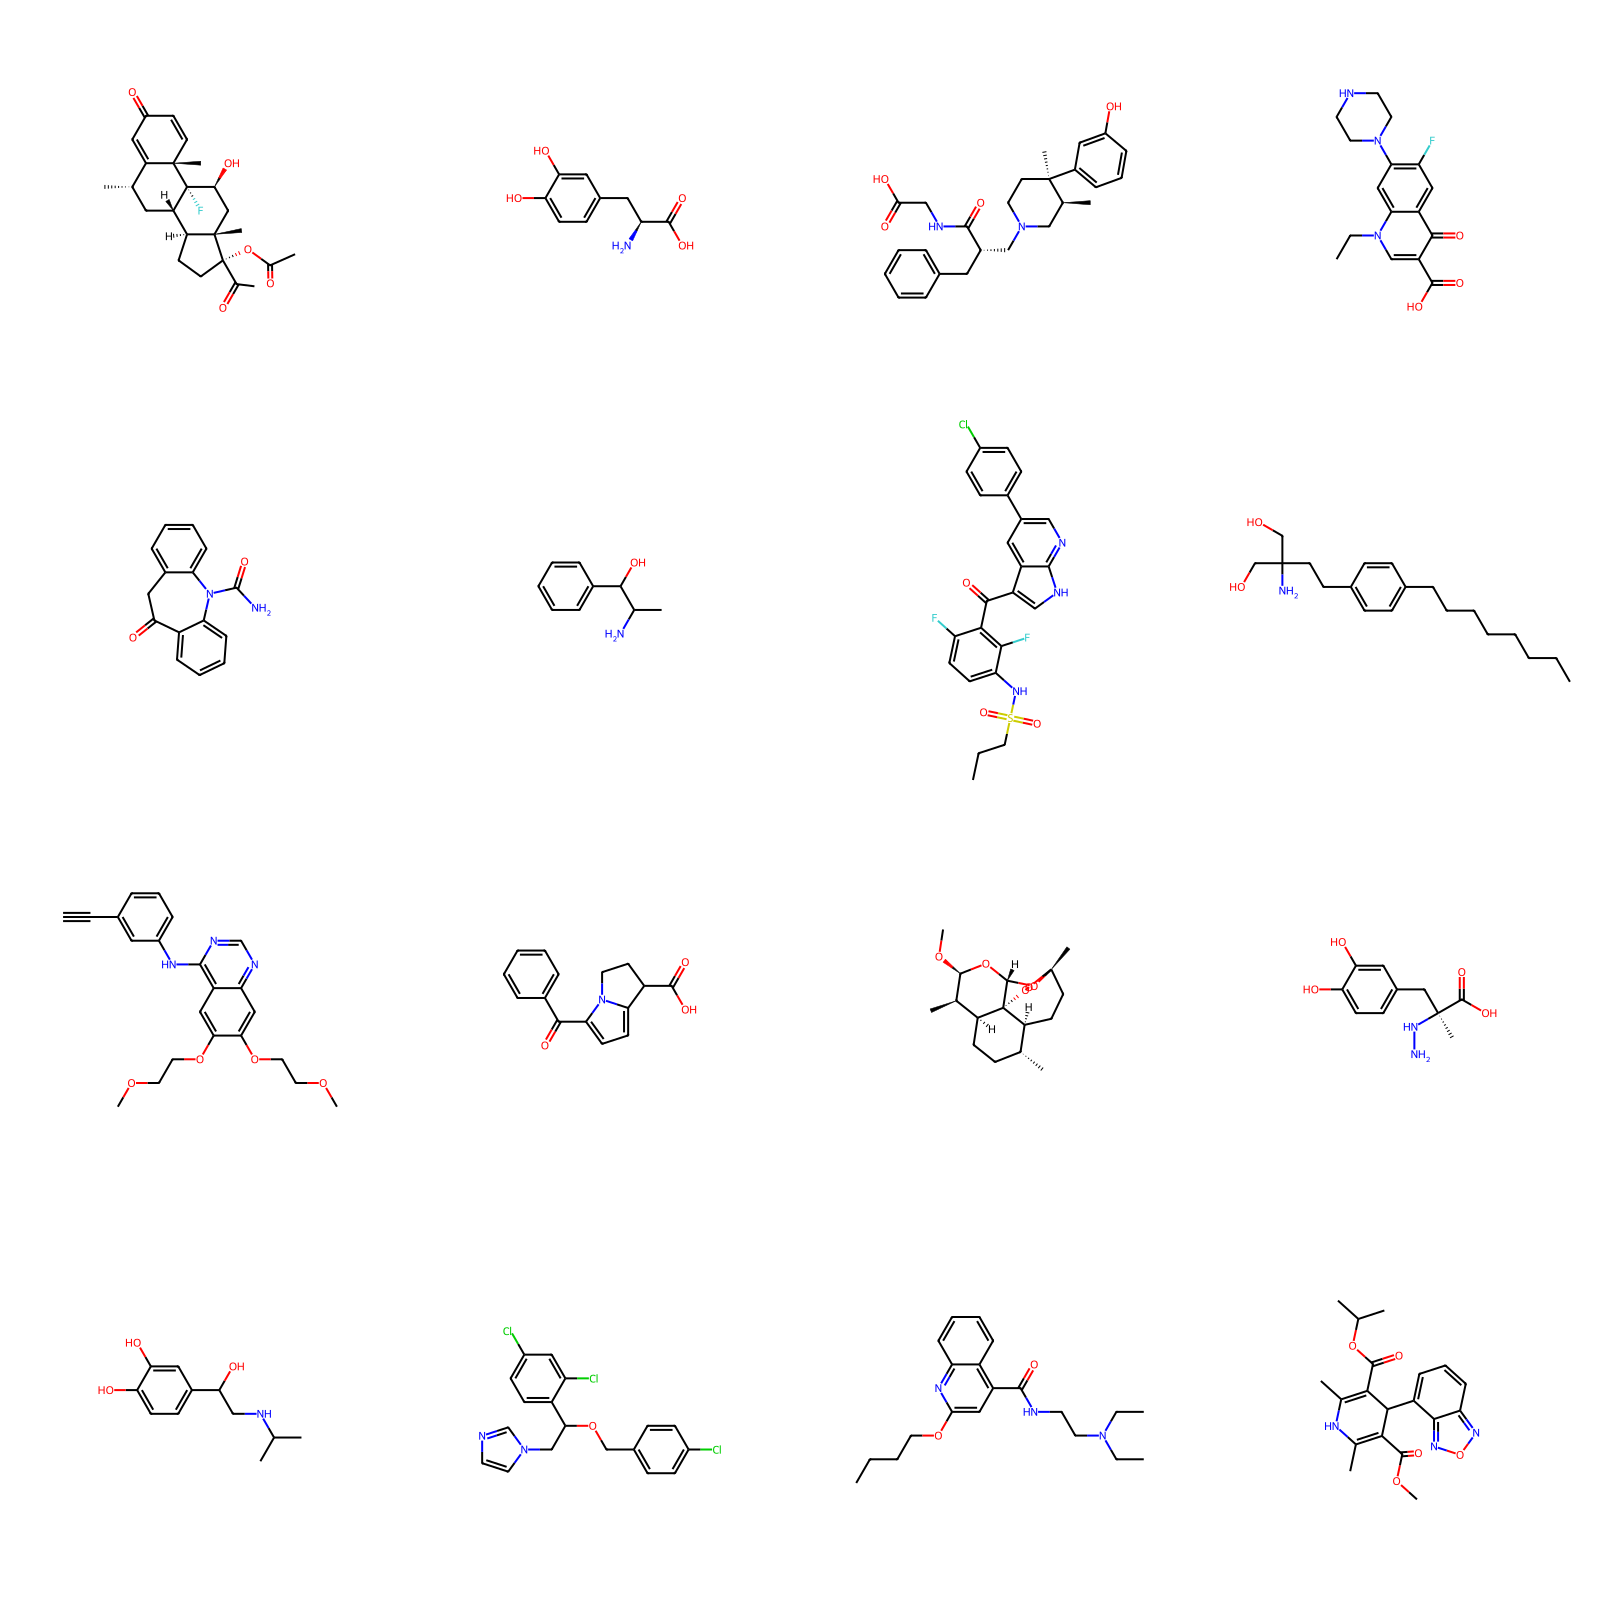

In [128]:
img=Draw.MolsToGridImage(list(sdmol)[:16],
                         molsPerRow=4,
                         subImgSize=(400,400),
                         )
img

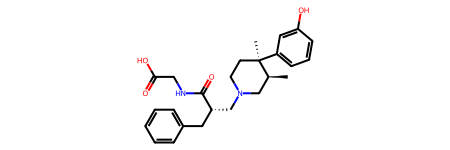

In [129]:
mol = sdmol[2]
mol

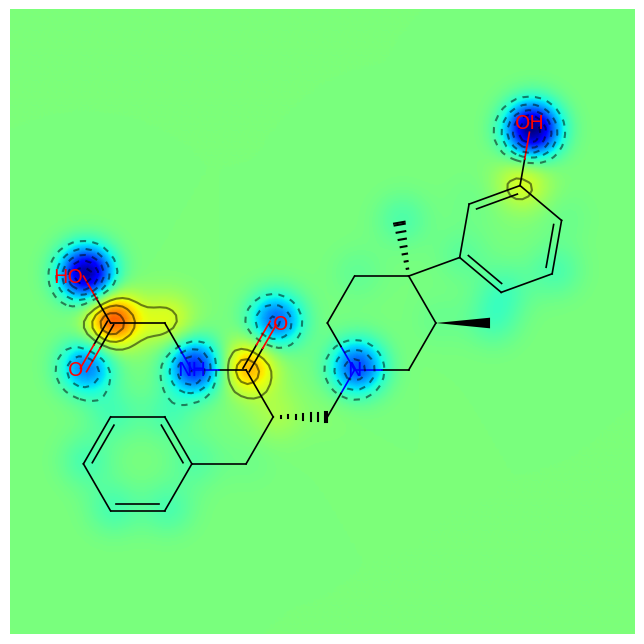

In [130]:
# visualize Gasteiger charges
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

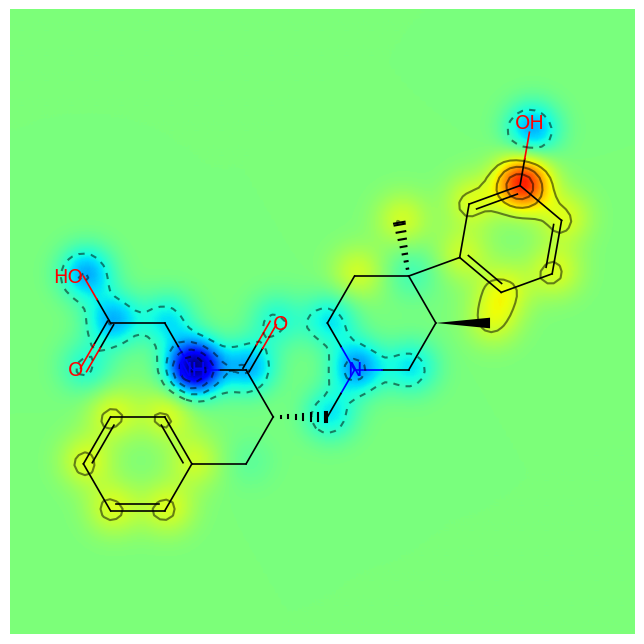

In [131]:
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)


# **Lipinski Rule of 5**

In [133]:
drugs = Chem.SDMolSupplier('drug_candidates.sdf')

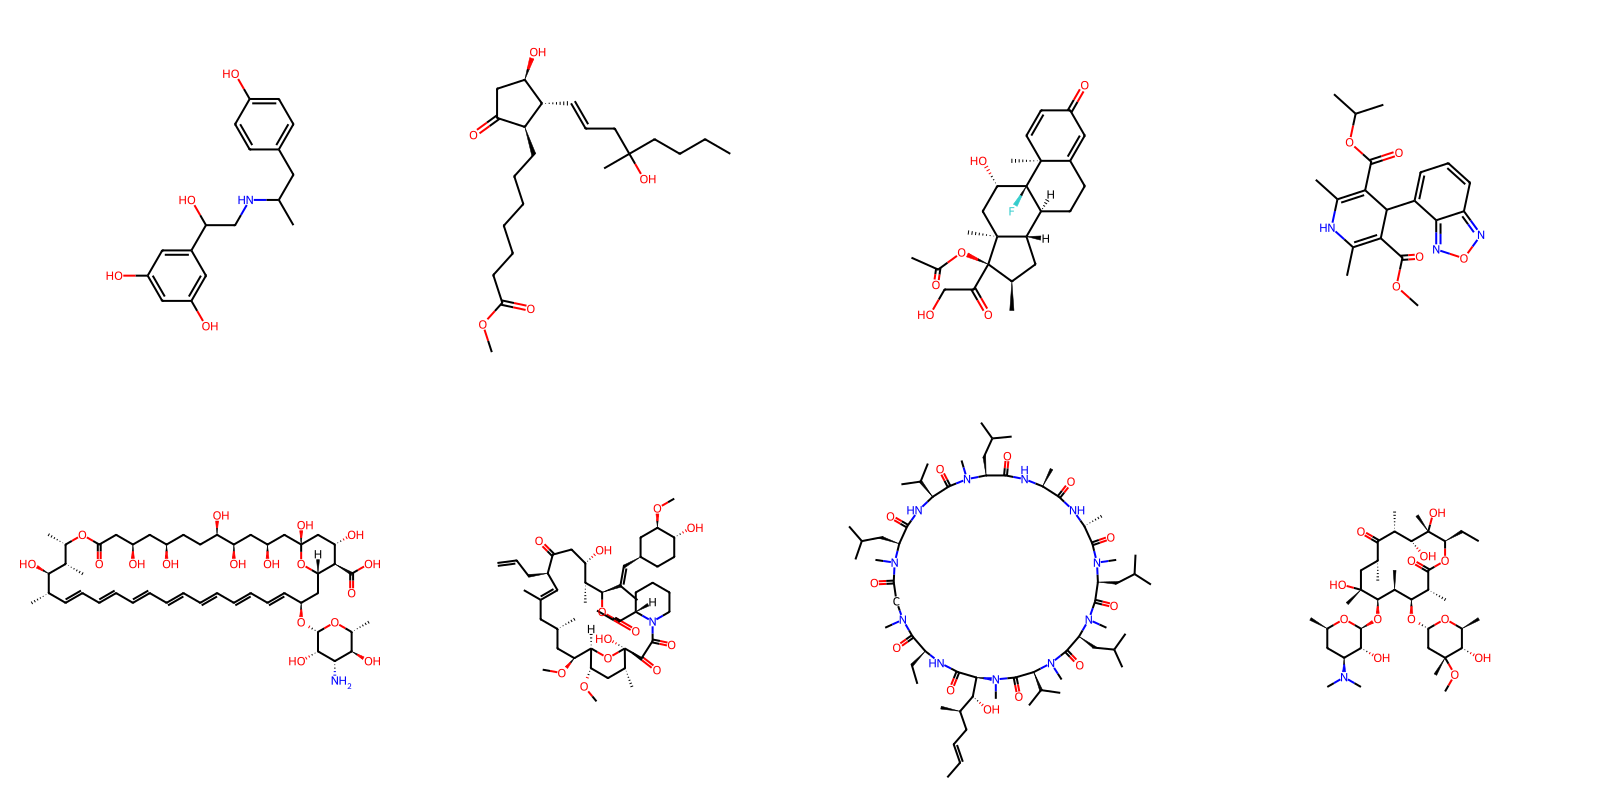

In [134]:
img=Draw.MolsToGridImage(list(drugs),
                         molsPerRow=4,
                         subImgSize=(400,400),
                         )
img

In [135]:
des_list = []

for mol in drugs:
  des = rdkit.Chem.Descriptors.CalcMolDescriptors(mol)
  des_list.append(des)

In [136]:
drugs_df = pd.concat([pd.Series(drugs), pd.DataFrame(des_list)], axis=1)

In [137]:
drugs_df.head()

,0,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,<rdkit.Chem.rdchem.Mol object at 0x7addc371fae0>,10.102988,10.102988,0.077600,-0.819196,0.563111,13.727273,303.358,282.190,303.147058,...,0,0,0,0,0,0,0,0,0,0
1,<rdkit.Chem.rdchem.Mol object at 0x7addc371ff40>,12.240130,12.240130,0.127363,-0.726974,0.286161,25.074074,382.541,344.237,382.271924,...,0,0,0,0,0,0,0,0,3,0
2,<rdkit.Chem.rdchem.Mol object at 0x7addc371fed0>,17.095462,17.095462,0.084640,-2.021085,0.662117,48.354839,434.504,403.256,434.210467,...,0,0,0,0,0,0,0,0,0,0
3,<rdkit.Chem.rdchem.Mol object at 0x7addc371fd80>,12.885905,12.885905,0.308760,-0.721713,0.818100,17.333333,371.393,350.225,371.148121,...,0,0,0,0,0,0,0,0,0,0
4,<rdkit.Chem.rdchem.Mol object at 0x7addc371f140>,12.613219,12.613219,0.107125,-2.325406,0.173524,45.492308,924.091,850.507,923.487850,...,0,0,0,0,0,0,0,0,0,0


In [138]:
drugs_df[['MolWt', 'NOCount', 'NHOHCount', 'MolLogP']].describe()

,MolWt,NOCount,NHOHCount,MolLogP
count,8.000000,8.000000,8.000000,8.000000
mean,644.561250,11.500000,4.500000,2.683150
std,322.229073,6.654751,3.779645,1.249186
min,303.358000,5.000000,1.000000,0.711700
25%,379.754000,5.750000,2.000000,1.989600
50%,584.220500,10.500000,4.000000,2.524350
75%,834.046000,15.000000,5.000000,3.440150
max,1202.635000,23.000000,13.000000,4.639000


In [139]:
# conditions = [MW <= 500, HBA <= 10, HBD <= 5, LogP <= 5]

In [140]:
df_lr  = drugs_df[(drugs_df['MolWt']<= 500) & (drugs_df['NOCount']<= 10) & (drugs_df['NHOHCount']<= 5) & (drugs_df['MolLogP']<= 5)]


In [141]:
df_lr.loc[:,0]

0    <rdkit.Chem.rdchem.Mol object at 0x7addc371fae0>
1    <rdkit.Chem.rdchem.Mol object at 0x7addc371ff40>
2    <rdkit.Chem.rdchem.Mol object at 0x7addc371fed0>
3    <rdkit.Chem.rdchem.Mol object at 0x7addc371fd80>
Name: 0, dtype: object

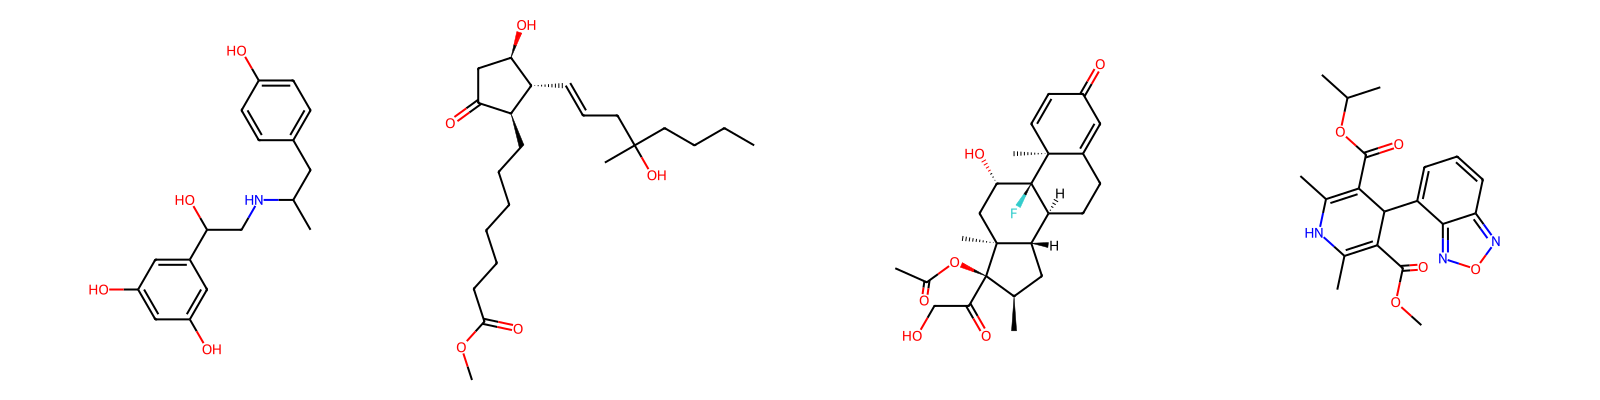

In [142]:
img=Draw.MolsToGridImage(df_lr.loc[:,0],
                         molsPerRow=4,
                         subImgSize=(400,400),
                         )
img

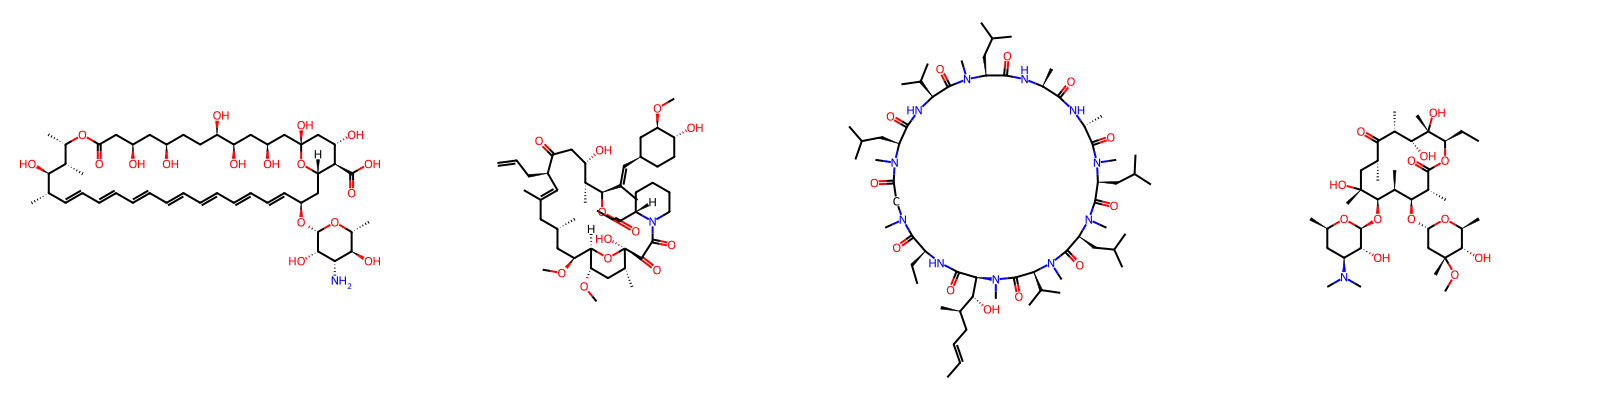

In [143]:
oth = drugs_df[~drugs_df.loc[:,0].isin(df_lr.loc[:,0])].loc[:,0]
img=Draw.MolsToGridImage(oth,
                         molsPerRow=4,
                         subImgSize=(400,400),
                         )
img

# **Drawing Reactions**

In [144]:
rxn = AllChem.ReactionFromSmarts('OC(C1=CC=CC=C1)=O.NC1CCCCC1>>O=C(NC1CCCCC1)C2=CC=CC=C2',useSmiles=True)


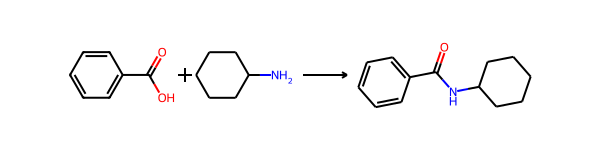

In [145]:
rxn

In [146]:
rxn = AllChem.ReactionFromSmarts('OC(C1=CC=CC=C1)=O.NC1CCCCC1>C1(CCCCC1)N=C=NC2CCCCC2>O=C(NC1CCCCC1)C2=CC=CC=C2',useSmiles=True)


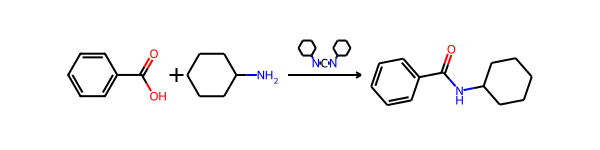

In [147]:
rxn